# **DATA ANALYTICS NSSC’24**

## <p style="text-align: center;"> Cosmic Collision- </p>

## <p style="text-align: center;"> Analysing Asteroid Risks with Data </p>

#### **Objective of the Analysis: Data-Driven Classification of Hazardous Asteroids**
The primary objective of this analysis is to use data analytics and machine learning techniques
to determine the likelihood of an asteroid being hazardous to Earth based on various features
provided in the dataset. This includes examining characteristics such as the asteroid's size,
orbital parameters, velocity, and proximity to Earth's orbit.
By analysing these features, the goal is to develop predictive models that classify asteroids into
hazardousand non-hazardouscategories. This classification is crucial for prioritising which
asteroids require further monitoring, potential deflection efforts, or other mitigation strategies.
We will also identify asteroids exhibiting unusual or anomalous behaviour that may warrant
closer attention.


In [158]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install imbalanced-learn
!pip install xgboost
!pip install optuna
!pip install shap
!pip install autofeat
!pip install tensorflow

In [159]:
from IPython.display import display
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap
from sklearn.inspection import permutation_importance
from autofeat import AutoFeatClassifier
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

In [160]:
import warnings
warnings.filterwarnings('ignore')

## **1. Exploratory Data Analysis**
### **1.1 Data Inspection**

**Task**: Inspect the dataset and determine the data types of all features (numerical, categorical)

In [161]:
df = pd.read_csv("dataset(2).csv")
display(df.head())

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0  3703080               7.889472e+11                    Very Slow   
1  3723955                        NaN                         Slow   
2  2446862               7.895520e+11                          NaN   
3  3092506               7.901568e+11                    Very Slow   
4  3514799               7.901568e+11                    Very Slow   

   Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                 22017.003799    13680.509944                  0.419483   
1                 65210.346095    40519.173105                       NaN   
2                 27326.560182    16979.661798                  0.050956   
3                 40225.948191    24994.839864                       NaN   
4                 35426.991794             NaN                  0.407832   

   Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0         163.178711              62753692.0         38993336.0   
1                NaN              57298148.0         35603420.0   
2          19.821890               7622911.5          4736657.5   
3                NaN                     NaN         26522368.0   
4         158.646713              61010824.0                NaN   

   Jupiter Tisserand Invariant  ...  Aphelion Dist  Perihelion Time  \
0                          NaN  ...       2.005764              NaN   
1                          NaN  ...       1.497352     2.457795e+06   
2                        4.557  ...       1.966857     2.458120e+06   
3                        5.093  ...       1.527904     2.457902e+06   
4                        5.154  ...            NaN     2.457814e+06   

   Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
0    264.837533     0.590551            NaN             1.0           1.0   
1    173.741112     0.845330         1995.0             1.0           1.0   
2           NaN          NaN         1995.0             NaN           8.0   
3     68.741007     0.700277         1995.0             NaN          15.0   
4           NaN          NaN            NaN             NaN          15.0   

   Orbital Period  Orbit Uncertainity  Hazardous  
0             Low              Medium       True  
1             Low                 NaN      False  
2          Medium                 NaN       True  
3             Low              Medium      False  
4             NaN                 Low       True  

[5 rows x 24 columns]

In the below cell we inspect the dataset and determine the data types of all features (numerical, categorical):


In [162]:
df.dtypes

Name                              int64
Epoch Date Close Approach       float64
Relative Velocity km per sec     object
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Semi Major Axis                 float64
Asc Node Longitude              float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
approach_year                   float64
approach_month                  float64
approach_day                    float64
Orbital Period                   object
Orbit Uncertainity               object
Hazardous                          bool
dtype: object

<table>
    <thead>
        <tr>
            <th>Name</th>
            <th>Type of Feature</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Epoch Date Close Approach</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Relative Velocity km per sec</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>Relative Velocity km per hr</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Miles per hour</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Miss Dist.(Astronomical)</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Miss Dist.(lunar)</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Miss Dist.(kilometers)</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Miss Dist.(miles)</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Jupiter Tisserand Invariant</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Epoch Osculation</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Semi Major Axis</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Asc Node Longitude</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Perihelion Arg</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Aphelion Dist</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Perihelion Time</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Mean Anomaly</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>Mean Motion</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>approach_year</td>
            <td>Numerical</td>
        </tr>
        <tr>
            <td>approach_month</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>approach_day</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>Orbital Period</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>Orbit Uncertainity</td>
            <td>Categorical</td>
        </tr>
    </tbody>
</table>

**Task**: Calculate and analyse basic statistics for each numerical feature, including range, mean,
median, standard deviation, and quartiles. 

In [163]:
def print_numerical_statistics(df):
    statistics: dict = {}

    for column in df.select_dtypes(include=[np.number]):  # This line selects numerical columns and not categorical ones
        stats: dict = {}

        if column not in ["Name", "Epoch Date Close Approach", "approach_year", 
                          "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"]:
            stats['Range'] = df[column].max() - df[column].min()
            stats['Mean'] = df[column].mean()
            stats['Median'] = df[column].median()
            stats['Standard Deviation'] = df[column].std()
            stats['1st Quartile (25%)'] = df[column].quantile(0.25)
            stats['3rd Quartile (75%)'] = df[column].quantile(0.75)
            
            statistics[column] = stats
    
    display(pd.DataFrame(statistics))

In [164]:
print_numerical_statistics(df)

Relative Velocity km per hr  Miles per hour  \
Range                             159473.673047    99090.738678   
Mean                               50516.969113    31312.455735   
Median                             46968.245275    28959.416222   
Standard Deviation                 26530.144294    16386.183907   
1st Quartile (25%)                 30437.415189    18843.393552   
3rd Quartile (75%)                 65210.346095    40331.941346   

                    Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
Range                               0.499706         194.171981   
Mean                                0.258221         100.709883   
Median                              0.265281         104.261452   
Standard Deviation                  0.146070          56.938739   
1st Quartile (25%)                  0.135807          52.877514   
3rd Quartile (75%)                  0.387033         150.434433   

                    Miss Dist.(kilometers)  Miss Dist.(miles)  \
Range                         7.475499e+07       4.645060e+07   
Mean                          3.842441e+07       2.391178e+07   
Median                        3.987901e+07       2.476464e+07   
Standard Deviation            2.207442e+07       1.357595e+07   
1st Quartile (25%)            1.950318e+07       1.246634e+07   
3rd Quartile (75%)            5.769962e+07       3.581782e+07   

                    Jupiter Tisserand Invariant  Epoch Osculation  \
Range                                  6.658000      7.064000e+03   
Mean                                   5.126265      2.457720e+06   
Median                                 5.102500      2.458000e+06   
Standard Deviation                     1.197144      9.248399e+02   
1st Quartile (25%)                     4.179250      2.458000e+06   
3rd Quartile (75%)                     6.043000      2.458000e+06   

                    Semi Major Axis  Asc Node Longitude  Perihelion Arg  \
Range                      1.952633          359.903949      359.986180   
Mean                       1.358242          172.185790      185.148924   
Median                     1.223551          173.895246      192.420121   
Standard Deviation         0.465313          103.055919      103.417240   
1st Quartile (25%)         0.990008           83.288427       96.100513   
3rd Quartile (75%)         1.626350          253.635285      273.067950   

                    Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  
Range                    3.858393     8.605420e+03    359.914799     1.707437  
Mean                     1.898115     2.457741e+06    182.735237     0.761090  
Median                   1.590005     2.457976e+06    189.051112     0.737684  
Standard Deviation       0.834499     9.155433e+02    107.757042     0.337745  
1st Quartile (25%)       1.260397     2.457826e+06     87.066671     0.483841  
3rd Quartile (75%)       2.331365     2.458109e+06    278.038676     1.002870

In [165]:
def calculate_categorical_statistics(df):
    statistics: dict = {}

    for column in df.select_dtypes(exclude=[np.number]):  # This line selects categorical columns and discards numerical ones
        stats: dict = {}
        
        if column not in ["Name", "Epoch Date Close Approach", "approach_year", "approach_month", "approach_day"]:
            stats['Unique Values'] = df[column].nunique()
            stats['Mode (Most Frequent)'] = df[column].mode()[0] if not df[column].mode().empty else None
            stats['Frequency of Mode'] = df[column].value_counts().max() if not df[column].value_counts().empty else None
            stats['Value Counts'] = df[column].value_counts().to_dict() 
            
            statistics[column] = stats
    
    display(pd.DataFrame(statistics))

In [166]:
calculate_categorical_statistics(df)

Relative Velocity km per sec  \
Unique Values                                                         4   
Mode (Most Frequent)                                               Slow   
Frequency of Mode                                                  1455   
Value Counts          {'Slow': 1455, 'Very Slow': 1319, 'Fast': 353,...   

                                                 Orbital Period  \
Unique Values                                                 3   
Mode (Most Frequent)                                        Low   
Frequency of Mode                                          2605   
Value Counts          {'Low': 2605, 'Medium': 917, 'High': 482}   

                                             Orbit Uncertainity  \
Unique Values                                                 3   
Mode (Most Frequent)                                        Low   
Frequency of Mode                                          1447   
Value Counts          {'Low': 1447, 'High': 671, 'Medium': 649}   

                                     Hazardous  
Unique Values                                2  
Mode (Most Frequent)                     False  
Frequency of Mode                         3798  
Value Counts          {False: 3798, True: 736}

**Task:** Identify features that have missing values

In [167]:
def columns_with_missing_values(df):
    missing_columns = df.columns[df.isnull().any()]  
    missing_info = df[missing_columns].isnull().sum()  
    return missing_info

columns_with_missing_values(df)

Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    819
approach_month                  1528
approach_day                     543
Orbital Period                   530
Orbit Uncertainity              1767
dtype: int64

**Task:** Use imputation to fill the null values in the dataset. How is this process different for
numerical and categorical columns?

In [168]:
def impute_speed(i):
    val = df['Miles per hour'][i]
    if np.isnan(val):
        return df['Relative Velocity km per sec'][i]
    if val < 25535:
        return "Very Slow"
    elif val < 50350:
        return "Slow"
    elif val < 73888:
        return "Fast"
    else:
        return "Very Fast"

def impute_orbital(i):
    val = df['Mean Motion'][i]
    if val < 0.338779:
        return "High"
    elif val >= 0.581602:
        return "Low"
    return "Medium"

def fill_day_nan(data, column):
    data[column] = data[column].fillna(method='ffill').fillna(method='bfill') - 1
    data[column] = data[column].clip(1, 31)
    return data

def fill_nan_with_mean(series):
    return series.interpolate()

def impute_data(data):
    mph_calc = data['Relative Velocity km per hr'] * 0.621371
    mph_act = data['Miles per hour']
    data['Miles per hour'] = np.where(mph_act.isna(), mph_calc, (mph_calc + mph_act) / 2)
    data.drop(['Relative Velocity km per hr'], axis=1, inplace=True)
    
    data['Relative Velocity km per sec'] = data.index.map(impute_speed)
    
    miss_miles1 = data['Miss Dist.(kilometers)'] * 0.621371
    miss_miles2 = data['Miss Dist.(Astronomical)'] * 92955807.267433
    miss_miles3 = data['Miss Dist.(lunar)'] / 4.186628026462e-6
    data['Miss Dist.(miles)'] = np.nanmean([miss_miles1, miss_miles2, miss_miles3, data['Miss Dist.(miles)']], axis=0)
    data.drop(['Miss Dist.(kilometers)', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)'], axis=1, inplace=True)
    
    data['Orbital Period'] = data.index.map(impute_orbital)
    
    data['approach_year'] = data['approach_year'].fillna(method='ffill').fillna(method='bfill')
    data['approach_month'] = data['approach_month'].fillna(method='ffill').fillna(method='bfill')
    data = fill_day_nan(data, 'approach_day')
    data['Epoch Date Close Approach'] = fill_nan_with_mean(data['Epoch Date Close Approach'])
    
    imputer = IterativeImputer(random_state=42)
    imputed_data = pd.DataFrame(imputer.fit_transform(data.drop(columns=data.select_dtypes(exclude=[np.number]).columns)), columns=data.select_dtypes(include=[np.number]).columns)
    
    return pd.concat([imputed_data, data['Relative Velocity km per sec'], data.iloc[:, -3:]], axis=1)

df_imputed = impute_data(df.copy(deep=True))


Imputation for numerical and categorical columns involves different approaches due to the nature of the data types. For numerical columns, such as "Miles per hour" and "Mean Motion," imputation methods involved calculating values based on statistical measures or relationships with other numerical variables. For instance, the function `fill_nan_with_mean` employs interpolation to estimate missing values based on adjacent entries, ensuring continuity in numerical data. 

Conversely, categorical columns, such as "Relative Velocity km per sec" and "Orbital Period," require a distinct method that considers the categorical nature of the data. In this case, categorical values are assigned based on specific conditions or thresholds, as seen in the `impute_speed` and `impute_orbital` functions, which classify speeds and orbital characteristics into discrete categories like "Very Slow," "Slow," or "High." 

In numerical imputation we interpolate values from a continuous distribution, while categorical imputation involves maintaining of the discrete categorical distribution while filling in the missing values.

### **1.2 Statistical Inference**

**Task:** Plot the distribution of numerical features to assess the skewness of the data. Does this
dataset require normalisation? If yes, normalise/scale the dataset. (Hint: Use
histograms) 

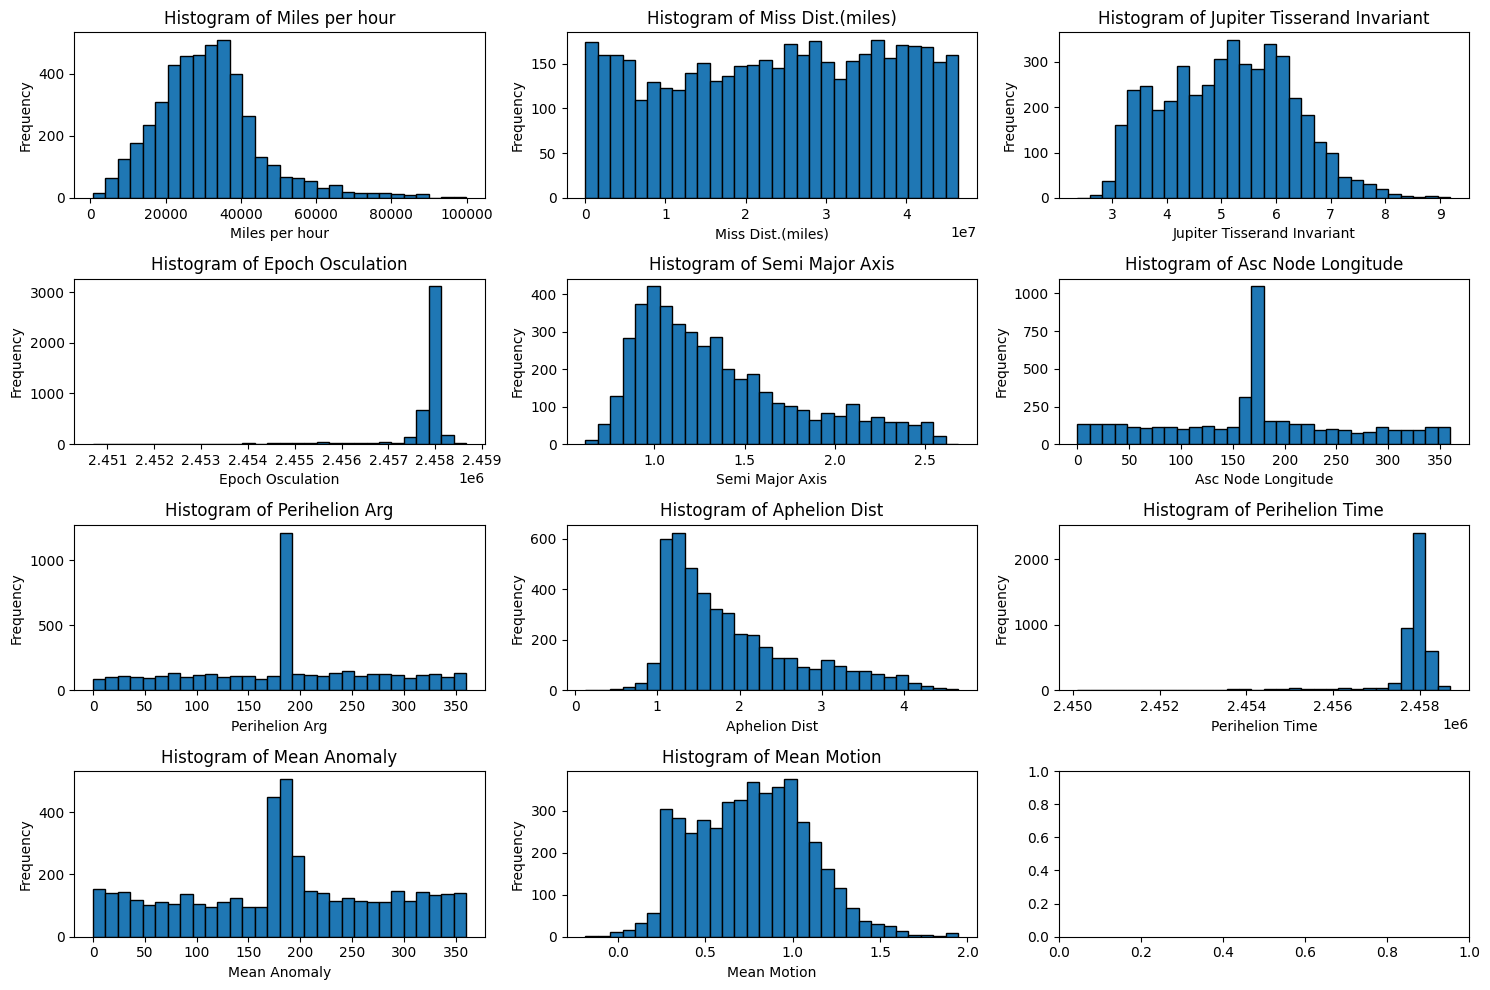

In [169]:
def plot_numerical_histograms(df, bins=30, figsize=(15, 10)):
    numerical_columns = df.select_dtypes(include=['number']).columns
    num_columns = 12
    
    fig, axes = plt.subplots(nrows=(num_columns // 3) + (num_columns % 3 > 0), ncols=3, figsize=figsize)
    axes = axes.flatten()

    i = 0
    for column in numerical_columns:
        if column not in ["Name", "Epoch Date Close Approach", "approach_year", 
                          "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"]:
            axes[i].hist(df[column].dropna(), bins=bins, edgecolor='black')
            axes[i].set_title(f'Histogram of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            i += 1

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

plot_numerical_histograms(df_imputed)

The `Relative velocity km per hour` and `Miles per hour` columns seem the most close to normally distributed, but the other columns show either a skewed distribution or an almost uniform one. **This the dataset needs normalisation**, which can be further confirmed by the use of a Q-Q plot.

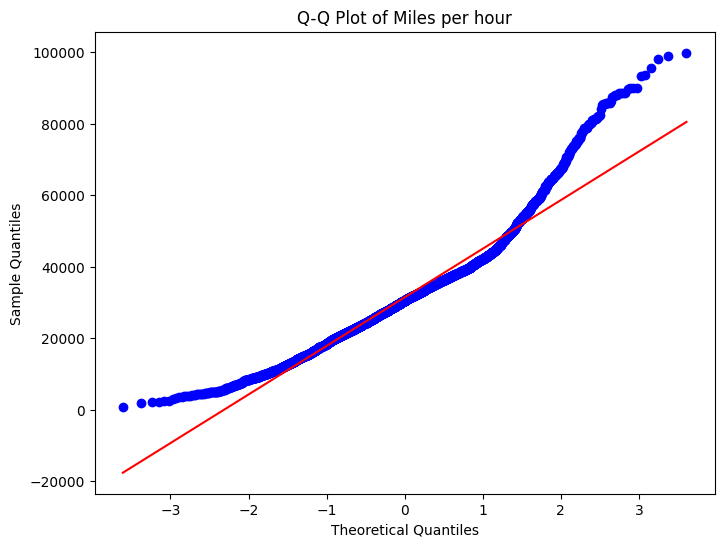

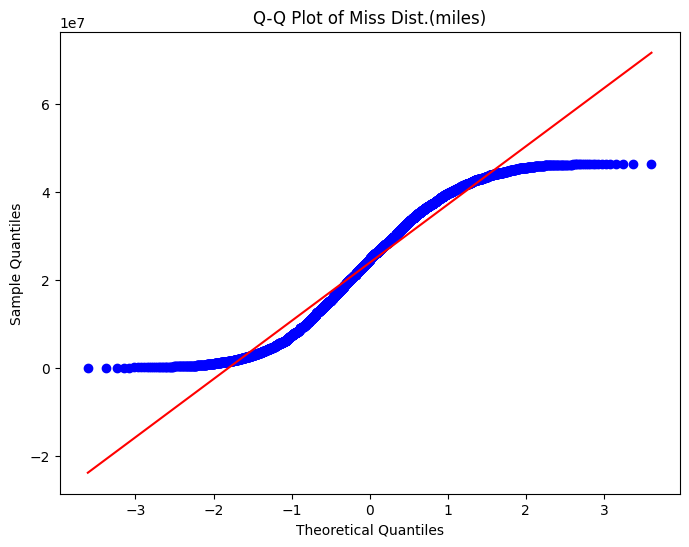

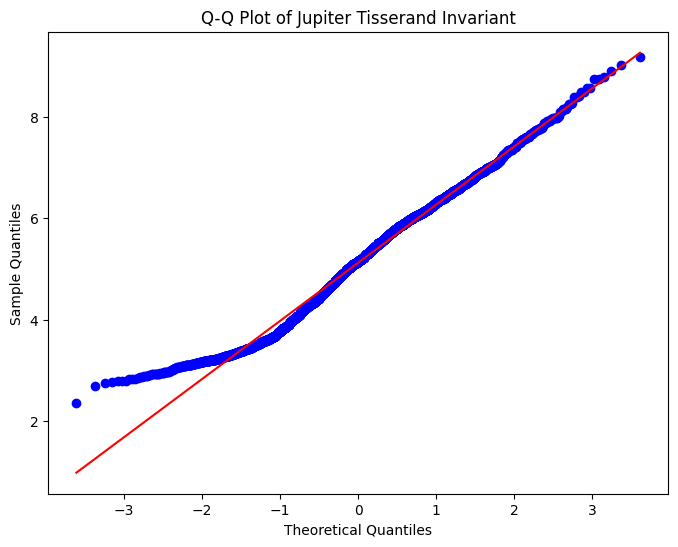

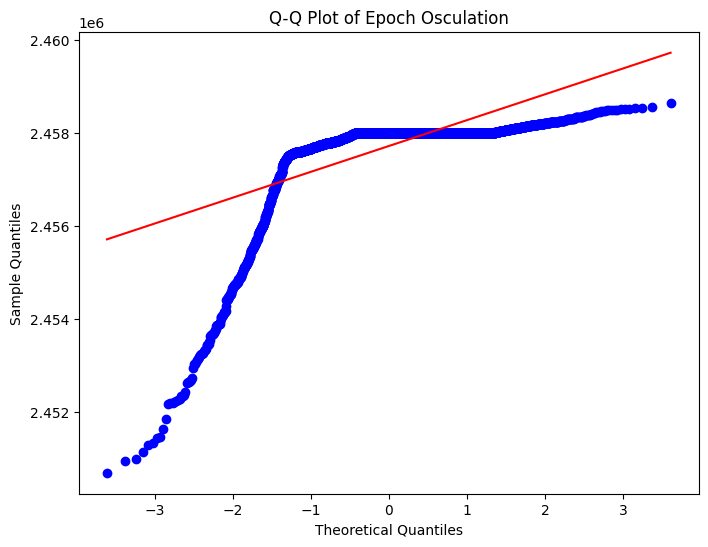

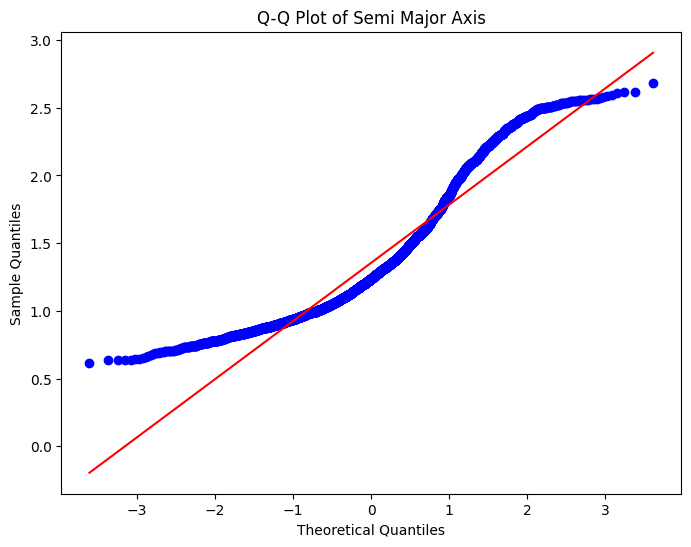

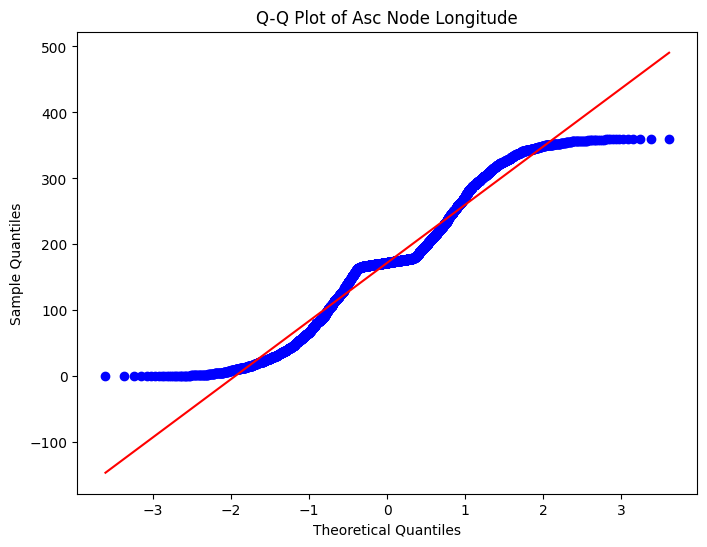

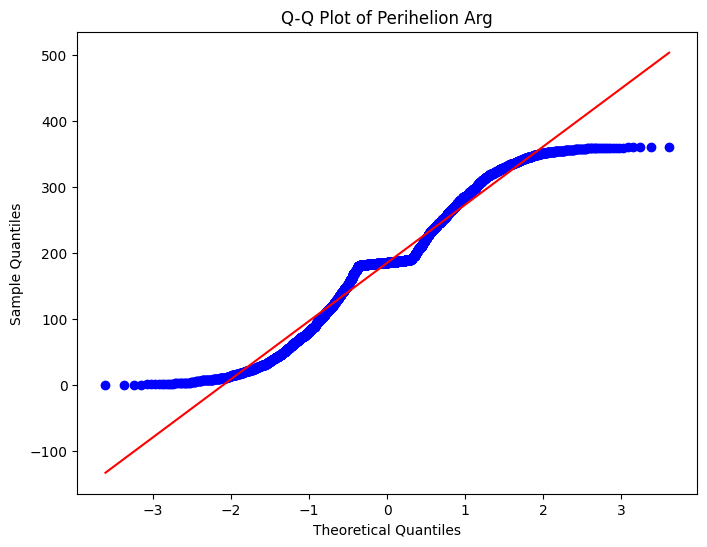

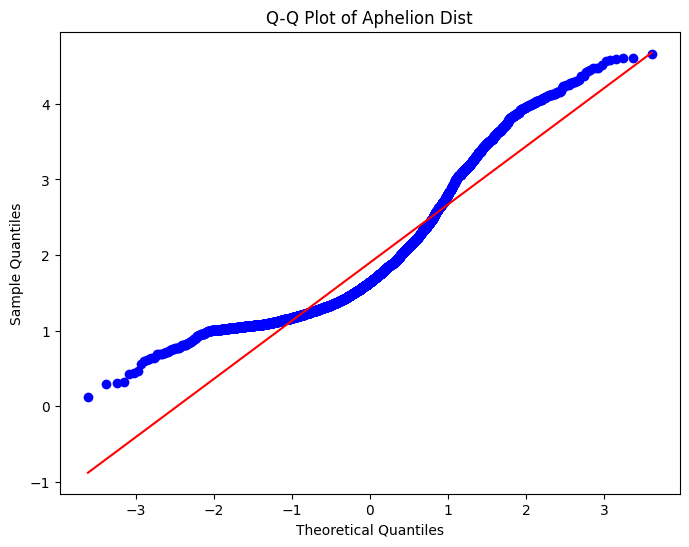

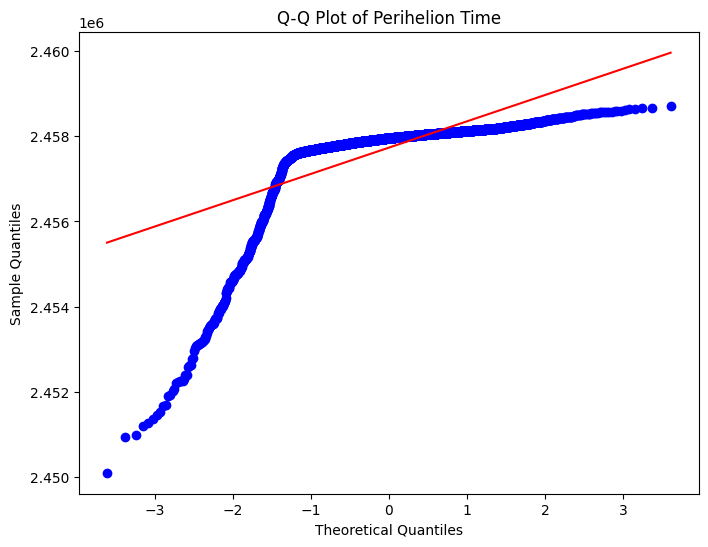

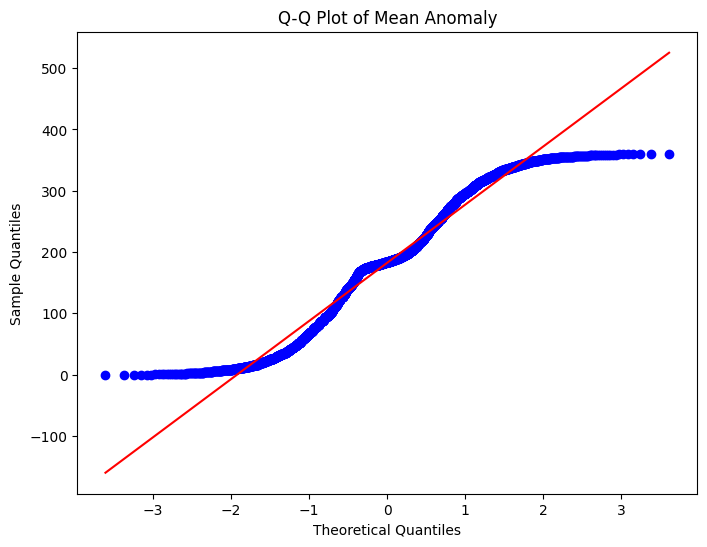

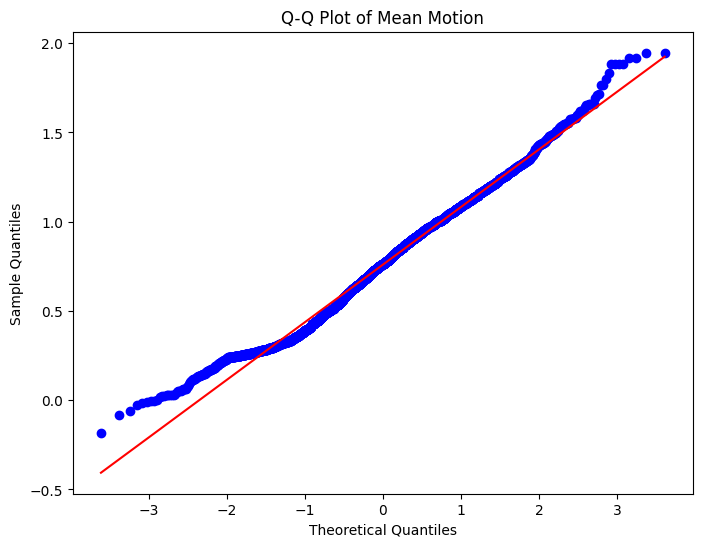

In [170]:
def qq_plots(df):
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for column in numerical_cols:
        if column not in ["Name", "Epoch Date Close Approach", "approach_year", 
                          "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"]:
            plt.figure(figsize=(8, 6))
            
            stats.probplot(df[column].dropna(), dist="norm", plot=plt)
            
            plt.title(f'Q-Q Plot of {column}')
            plt.xlabel('Theoretical Quantiles')
            plt.ylabel('Sample Quantiles')
            plt.show()

qq_plots(df_imputed)

In [171]:
def normalise(df):
    copy_df = df.copy(deep=True)
    numerical_cols = df.select_dtypes(include=['number']).columns
    num_columns = len(numerical_cols)
    
    for i, column in enumerate(numerical_cols):
        if column not in ["Name", "Epoch Date Close Approach", "approach_year", "Epoch Osculation",
                          "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"]:
            col_mean = copy_df[column].mean()
            col_std = copy_df[column].std()
            
            copy_df[column] = (copy_df[column] - col_mean)/col_std
    
    return copy_df

df_scaled = (df_imputed)    

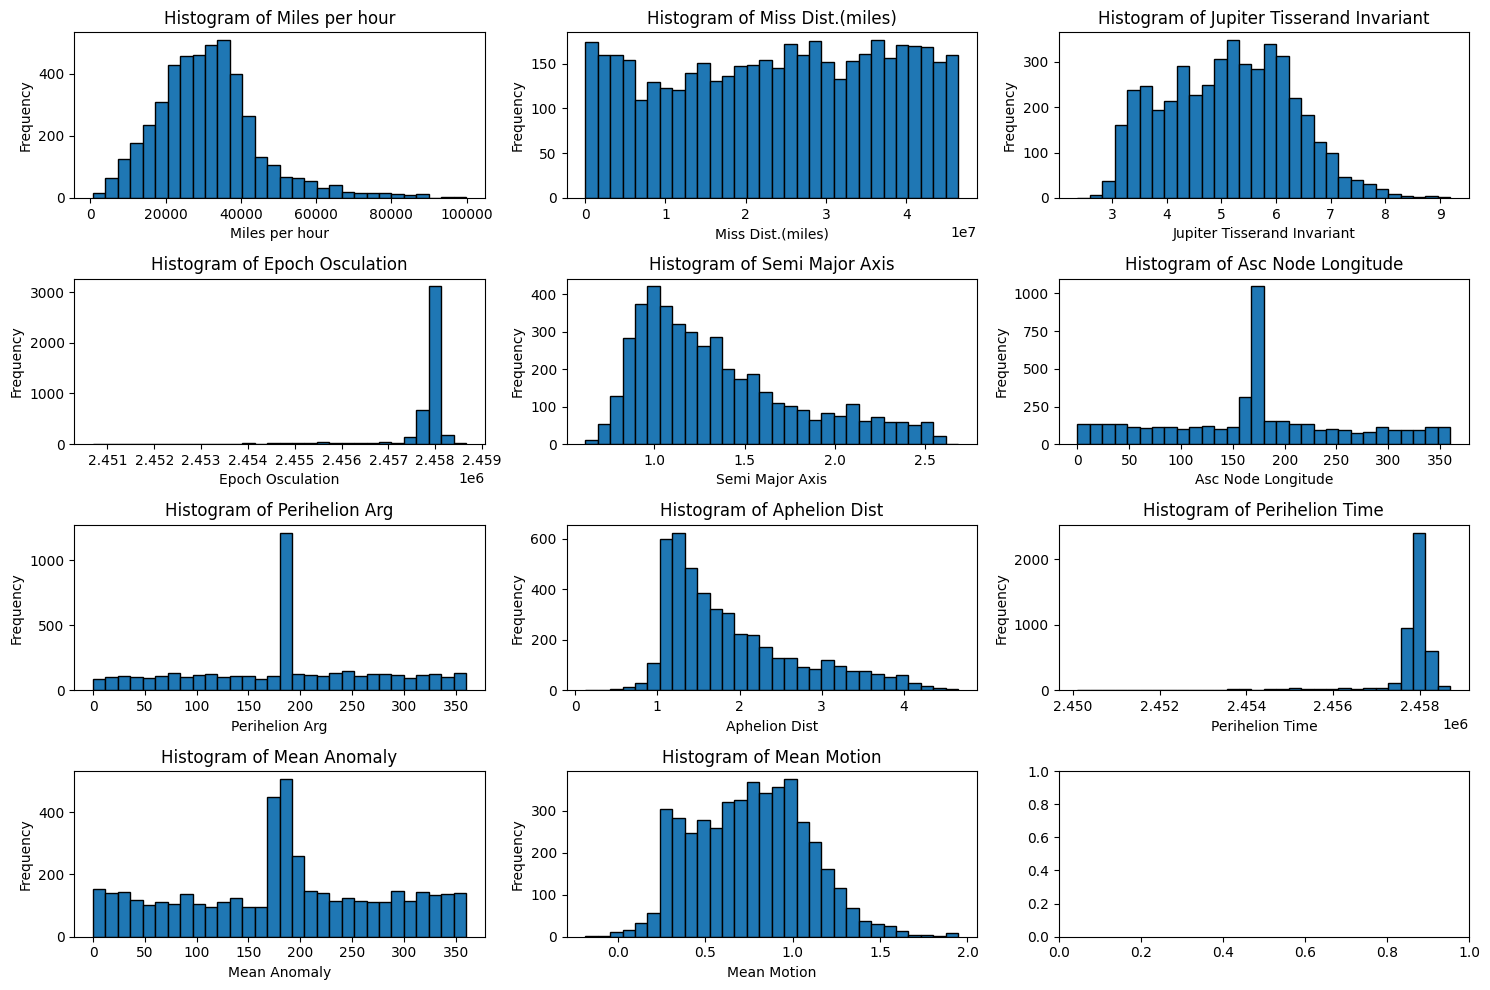

In [172]:
plot_numerical_histograms(df_scaled)

**Task:** Identify potential outliers in the numerical columns using any statistical technique (e.g.,
box plots, z-score, etc.).

The Z-score is a statistical measurement that describes how many standard deviations a data point is from the mean. A Z-score of 0 indicates that the data point is exactly at the mean. Z-scores larger than 3 (or smaller than -3) are typically considered outliers.

$$ Z^{(i)} = \frac{x^{(i)} - \mu}{\sigma} 


In [173]:
def detect_outliers_z_score(df, threshold=3):
    numerical_columns = df.select_dtypes(include=['number']).columns
    outliers = {}
    
    for column in numerical_columns:
        if column not in ["Name", "Epoch Date Close Approach", "approach_year", 
                        "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"]:
            col_zscore = (df[column] - df[column].mean()) / df[column].std()
            outliers[column] = df[np.abs(col_zscore) > threshold]
    
    return outliers

for i in (outliers:=detect_outliers_z_score(df_scaled)):
    print(f"These are the Z-score based outliers for the column { i }")
    display(outliers[i])

These are the Z-score based outliers for the column Miles per hour


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
14    3446396.0               7.922304e+11    88593.862987       2.797319e+07   
57    2088959.0               8.005212e+11    82548.501614       2.873103e+07   
121   3160737.0               8.114508e+11    73849.010501       3.985289e+07   
132   3610358.0               8.137404e+11    77662.960323       3.530600e+07   
162   3644343.0               8.216928e+11    75895.731437       2.427856e+07   
...         ...                        ...             ...                ...   
4354  2455594.0               1.456128e+12    85377.821881       3.718997e+07   
4363  2466130.0               1.457424e+12    95559.373658       2.414337e+07   
4444  3720770.0               1.465369e+12    81212.921655       2.855478e+07   
4513  3425295.0               1.471244e+12    76756.577912       2.062347e+07   
4533  3772978.0               1.473318e+12    80410.152504       4.298015e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
14                       3.367058      2.457752e+06         2.089091   
57                       3.826408      2.458000e+06         1.723591   
121                      2.976000      2.457477e+06         2.535083   
132                      3.625000      2.458000e+06         1.814800   
162                      3.970000      2.458000e+06         1.532200   
...                           ...               ...              ...   
4354                     4.081472      2.458000e+06         1.758952   
4363                     2.367000      2.458000e+06         2.489714   
4444                     5.953857      2.457872e+06         0.944996   
4513                     4.841000      2.457602e+06         1.206155   
4533                     4.108000      2.458356e+06         1.474045   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
14            163.209923      199.371459       3.690062     2.457665e+06   
57             38.987270      114.969950       2.695658     2.458080e+06   
121           344.161592      118.259534       4.418447     2.457387e+06   
132            30.879491      186.078246       3.061958     2.458099e+06   
162           174.937735      188.053784       2.302800     2.457725e+06   
...                  ...             ...            ...              ...   
4354          344.600152      280.812789       2.853509     2.458339e+06   
4363          177.557256      357.820027       4.004020     2.457448e+06   
4444          101.516387      302.024199       1.641972     2.457922e+06   
4513          146.963084      188.223873       2.097574     2.457688e+06   
4533          187.642183      222.436688       2.673445     2.458319e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
14       37.517257     0.353025         1995.0             1.0           7.0   
57      325.397297     0.435565         1995.0             4.0          14.0   
121     174.249476     0.025747         1995.0             9.0          21.0   
132     324.154910     0.403145         1995.0            10.0          14.0   
162     143.127207     0.519674         1996.0             1.0          14.0   
...            ...          ...            ...             ...           ...   
4354    217.093557     0.538721         2016.0             2.0          21.0   
4363    138.526757     0.250888         2016.0             3.0           7.0   
4444    172.783166     1.072900         2016.0             6.0           7.0   
4513    253.119105     0.744045         2016.0             8.0          14.0   
4533    177.343811     0.550729         2016.0             9.0           7.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
14                      Very Fast         Medium                NaN      False  
57                      Very Fast         Medium                Low      False  
121                          Fast         Medium        

These are the Z-score based outliers for the column Miss Dist.(miles)


Empty DataFrame
Columns: [Name, Epoch Date Close Approach, Miles per hour, Miss Dist.(miles), Jupiter Tisserand Invariant, Epoch Osculation, Semi Major Axis, Asc Node Longitude, Perihelion Arg, Aphelion Dist, Perihelion Time, Mean Anomaly, Mean Motion, approach_year, approach_month, approach_day, Relative Velocity km per sec, Orbital Period, Orbit Uncertainity, Hazardous]
Index: []

These are the Z-score based outliers for the column Jupiter Tisserand Invariant


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
610   2418265.0               9.131040e+11    42446.255253       4.137701e+07   
1693  2434326.0               1.113548e+12    30652.474472       1.559419e+07   
2094  2434326.0               1.176772e+12    40104.813821       2.586889e+07   
2324  2434326.0               1.208243e+12    44934.358143       3.139122e+07   
2677  3477942.0               1.258877e+12    26923.349977       5.149407e+06   
3520  3566699.0               1.369206e+12    56870.099382       3.528309e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
610                      9.025000      2.458000e+06         0.615920   
1693                     8.751000      2.458000e+06         0.635216   
2094                     8.751000      2.458000e+06         0.635216   
2324                     9.187500      2.457952e+06         0.635216   
2677                     8.909765      2.457576e+06         0.779600   
3520                     8.789014      2.455710e+06         0.703344   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
610           100.961285      183.999304       0.803765     2.457916e+06   
1693           37.031874      187.975291       0.972642     2.458138e+06   
2094          174.194941      352.992737       0.972642     2.458023e+06   
2324           37.031874      352.992737       0.464162     2.458023e+06   
2677           64.168480      172.249204       1.044951     2.457640e+06   
3520          168.002423      185.775452       1.039807     2.455620e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
610      95.538137     1.536976         1998.0            11.0           7.0   
1693    315.539623     1.946801         2005.0             4.0          14.0   
2094    315.539623     1.532070         2007.0             4.0          14.0   
2324    315.539623     1.946801         2008.0             4.0          14.0   
2677    189.813518     1.882170         2009.0            11.0          21.0   
3520    170.636199     1.886239         2013.0             5.0          21.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
610                          Slow         Medium                Low      False  
1693                         Slow            Low                Low       True  
2094                         Slow         Medium                NaN       True  
2324                         Slow            Low                Low       True  
2677                         Slow            Low               High      False  
3520                         Fast            Low               High      False

These are the Z-score based outliers for the column Epoch Osculation


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
22    3005973.0               7.934400e+11    63570.864644       4.511209e+06   
130   3092146.0               8.137404e+11    10162.438795       3.924253e+07   
414   2003361.0               8.765964e+11    13473.384324       3.131324e+07   
437   3440319.0               8.815680e+11    21974.226945       1.732687e+06   
446   3013651.0               8.844883e+11    34475.150660       2.822360e+07   
...         ...                        ...             ...                ...   
3901  2085770.0               1.412752e+12    33989.929271       2.198600e+07   
4099  3092237.0               1.429686e+12    30933.899089       1.934343e+07   
4228  2085770.0               1.444288e+12    37281.932962       2.319081e+07   
4326  2001685.0               1.453450e+12    31065.743447       1.454903e+07   
4526  3394709.0               1.473318e+12    38650.580027       3.618797e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
22                       6.152000      2.453548e+06         0.906734   
130                      4.545000      2.450694e+06         1.553596   
414                      5.362642      2.455114e+06         1.258761   
437                      7.401000      2.454798e+06         0.779475   
446                      5.201000      2.450990e+06         1.204753   
...                           ...               ...              ...   
3901                     5.898000      2.453884e+06         0.998744   
4099                     5.425325      2.454728e+06         1.094270   
4228                     5.623762      2.453884e+06         1.031189   
4326                     4.716000      2.454580e+06         1.367130   
4526                     5.984197      2.454418e+06         0.881848   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
22            178.862685      322.390496       1.694158     2.453598e+06   
130            12.471084      183.315276       2.035348     2.450100e+06   
414           170.483651      301.703155       1.599970     2.455220e+06   
437            81.503614      146.397236       0.610063     2.454903e+06   
446           269.562554      186.098284       1.427639     2.450942e+06   
...                  ...             ...            ...              ...   
3901          173.454808      234.377277       1.343254     2.453935e+06   
4099          211.360496        7.181340       1.587085     2.454622e+06   
4228           18.405054      234.377277       1.343254     2.453942e+06   
4326          176.496714      127.072787       2.054268     2.454442e+06   
4526           43.263028      155.100937       1.080329     2.454382e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
22      303.979299     1.141522         1995.0             2.0          21.0   
130      39.463456     0.621175         1995.0            10.0          14.0   
414     281.992370     0.811659         1997.0            10.0          14.0   
437     209.060837     1.432190         1997.0            12.0           7.0   
446      36.229800     0.745345         1998.0             1.0           7.0   
...            ...          ...            ...             ...           ...   
3901    319.207916     0.987467         2014.0            10.0           7.0   
4099    155.618076     0.861028         2015.0             4.0          21.0   
4228    319.207916     0.916361         2015.0            10.0           7.0   
4326     18.419869     0.738306         2016.0             1.0          21.0   
4526    228.373430     1.010543         2016.0             9.0           7.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
22                           Fast            Low                NaN       True  
130                     Very Slow         Medium               High      False  
414                     Very Slow         Medium        

These are the Z-score based outliers for the column Semi Major Axis


Empty DataFrame
Columns: [Name, Epoch Date Close Approach, Miles per hour, Miss Dist.(miles), Jupiter Tisserand Invariant, Epoch Osculation, Semi Major Axis, Asc Node Longitude, Perihelion Arg, Aphelion Dist, Perihelion Time, Mean Anomaly, Mean Motion, approach_year, approach_month, approach_day, Relative Velocity km per sec, Orbital Period, Orbit Uncertainity, Hazardous]
Index: []

These are the Z-score based outliers for the column Asc Node Longitude


Empty DataFrame
Columns: [Name, Epoch Date Close Approach, Miles per hour, Miss Dist.(miles), Jupiter Tisserand Invariant, Epoch Osculation, Semi Major Axis, Asc Node Longitude, Perihelion Arg, Aphelion Dist, Perihelion Time, Mean Anomaly, Mean Motion, approach_year, approach_month, approach_day, Relative Velocity km per sec, Orbital Period, Orbit Uncertainity, Hazardous]
Index: []

These are the Z-score based outliers for the column Perihelion Arg


Empty DataFrame
Columns: [Name, Epoch Date Close Approach, Miles per hour, Miss Dist.(miles), Jupiter Tisserand Invariant, Epoch Osculation, Semi Major Axis, Asc Node Longitude, Perihelion Arg, Aphelion Dist, Perihelion Time, Mean Anomaly, Mean Motion, approach_year, approach_month, approach_day, Relative Velocity km per sec, Orbital Period, Orbit Uncertainity, Hazardous]
Index: []

These are the Z-score based outliers for the column Aphelion Dist


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
121   3160737.0               8.114508e+11    73849.010501       3.985289e+07   
183   3742127.0               8.249760e+11    32871.031058       2.970871e+07   
1328  2293054.0               1.050390e+12    49632.742868       3.857406e+07   
1607  2190119.0               1.097521e+12    88647.201852       3.264385e+07   
1678  3457435.0               1.110269e+12    36983.674572       3.343994e+07   
2315  3758850.0               1.206904e+12    43165.172626       1.053948e+07   
2528  3445443.0               1.237705e+12    61163.864101       4.378372e+07   
3000  3713990.0               1.303456e+12    25487.403580       1.370437e+07   
3107  2423100.0               1.319267e+12    87673.138365       4.226920e+07   
3325  3610526.0               1.347088e+12    31696.437874       2.783829e+07   
3370  3767241.0               1.350889e+12    36440.123173       4.031314e+07   
3424  3761480.0               1.358035e+12    46083.093828       3.853680e+07   
4015  3707694.0               1.421309e+12    63800.732560       2.298522e+06   
4109  3719244.0               1.431673e+12    54736.739559       1.306345e+06   
4247  3735464.0               1.445497e+12    24798.970349       1.275237e+07   
4272  2297274.0               1.448179e+12    37070.655483       3.197189e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
121                      2.976000      2.457477e+06         2.535083   
183                      3.069313      2.458000e+06         2.507453   
1328                     2.945000      2.458000e+06         2.683731   
1607                     2.926237      2.458000e+06         2.501996   
1678                     3.119743      2.458000e+06         2.523505   
2315                     2.883718      2.457500e+06         2.566519   
2528                     2.902695      2.457759e+06         2.521374   
3000                     2.881000      2.458000e+06         2.562957   
3107                     2.932646      2.458000e+06         2.411402   
3325                     2.759000      2.457563e+06         2.439108   
3370                     2.921000      2.458000e+06         2.533844   
3424                     2.927000      2.458000e+06         2.491292   
4015                     2.993973      2.458000e+06         2.368445   
4109                     2.867000      2.457162e+06         2.555342   
4247                     3.270607      2.457346e+06         2.477318   
4272                     3.124960      2.457438e+06         2.614632   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
121           344.161592      118.259534       4.418447     2.457387e+06   
183           101.105035      327.417444       4.372651     2.457365e+06   
1328          178.308182       22.940728       4.475405     2.458003e+06   
1607          225.538780       19.912055       4.662158     2.457492e+06   
1678           31.061829       54.751773       4.591489     2.457794e+06   
2315          175.882806       92.844533       4.474161     2.457586e+06   
2528          167.536974      182.955009       4.604727     2.457841e+06   
3000          174.214489       57.210710       4.581599     2.458034e+06   
3107           92.784062      168.824184       4.431998     2.458000e+06   
3325          179.326347       56.171202       4.606584     2.457524e+06   
3370          165.843841       16.352437       4.509536     2.457900e+06   
3424           32.515458      114.337359       4.471238     2.457754e+06   
4015          179.750997      190.487842       4.367984     2.458334e+06   
4109           56.645157       85.427135       4.564151     2.457113e+06   
4247          141.234388      159.423798       4.445157     2.457274e+06   
4272          197.419604      284.342125       4.367131     2.457379e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
121     174.249476     0.025747    

These are the Z-score based outliers for the column Perihelion Time


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
22    3005973.0               7.934400e+11    63570.864644       4.511209e+06   
130   3092146.0               8.137404e+11    10162.438795       3.924253e+07   
437   3440319.0               8.815680e+11    21974.226945       1.732687e+06   
446   3013651.0               8.844883e+11    34475.150660       2.822360e+07   
475   3388356.0               8.893440e+11    31592.586249       3.808108e+07   
...         ...                        ...             ...                ...   
3901  2085770.0               1.412752e+12    33989.929271       2.198600e+07   
4099  3092237.0               1.429686e+12    30933.899089       1.934343e+07   
4228  2085770.0               1.444288e+12    37281.932962       2.319081e+07   
4326  2001685.0               1.453450e+12    31065.743447       1.454903e+07   
4526  3394709.0               1.473318e+12    38650.580027       3.618797e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
22                       6.152000      2.453548e+06         0.906734   
130                      4.545000      2.450694e+06         1.553596   
437                      7.401000      2.454798e+06         0.779475   
446                      5.201000      2.450990e+06         1.204753   
475                      4.600000      2.455233e+06         1.406311   
...                           ...               ...              ...   
3901                     5.898000      2.453884e+06         0.998744   
4099                     5.425325      2.454728e+06         1.094270   
4228                     5.623762      2.453884e+06         1.031189   
4326                     4.716000      2.454580e+06         1.367130   
4526                     5.984197      2.454418e+06         0.881848   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
22            178.862685      322.390496       1.694158     2.453598e+06   
130            12.471084      183.315276       2.035348     2.450100e+06   
437            81.503614      146.397236       0.610063     2.454903e+06   
446           269.562554      186.098284       1.427639     2.450942e+06   
475            19.382838       62.413037       1.779221     2.455060e+06   
...                  ...             ...            ...              ...   
3901          173.454808      234.377277       1.343254     2.453935e+06   
4099          211.360496        7.181340       1.587085     2.454622e+06   
4228           18.405054      234.377277       1.343254     2.453942e+06   
4326          176.496714      127.072787       2.054268     2.454442e+06   
4526           43.263028      155.100937       1.080329     2.454382e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
22      303.979299     1.141522         1995.0             2.0          21.0   
130      39.463456     0.621175         1995.0            10.0          14.0   
437     209.060837     1.432190         1997.0            12.0           7.0   
446      36.229800     0.745345         1998.0             1.0           7.0   
475     251.665430     0.590993         1998.0             3.0           7.0   
...            ...          ...            ...             ...           ...   
3901    319.207916     0.987467         2014.0            10.0           7.0   
4099    155.618076     0.861028         2015.0             4.0          21.0   
4228    319.207916     0.916361         2015.0            10.0           7.0   
4326     18.419869     0.738306         2016.0             1.0          21.0   
4526    228.373430     1.010543         2016.0             9.0           7.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
22                           Fast            Low                NaN       True  
130                     Very Slow         Medium               High      False  
437                     Very Slow            Low        

These are the Z-score based outliers for the column Mean Anomaly


Empty DataFrame
Columns: [Name, Epoch Date Close Approach, Miles per hour, Miss Dist.(miles), Jupiter Tisserand Invariant, Epoch Osculation, Semi Major Axis, Asc Node Longitude, Perihelion Arg, Aphelion Dist, Perihelion Time, Mean Anomaly, Mean Motion, approach_year, approach_month, approach_day, Relative Velocity km per sec, Orbital Period, Orbit Uncertainity, Hazardous]
Index: []

These are the Z-score based outliers for the column Mean Motion


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
658   2138127.0               9.214848e+11    43268.521646       4.263083e+07   
1317  3712947.0               1.048686e+12    27118.399401       1.663712e+07   
1448  3624059.0               1.072080e+12    34195.936207       1.532717e+07   
1693  2434326.0               1.113548e+12    30652.474472       1.559419e+07   
1725  2066391.0               1.118214e+12    79853.736873       4.603260e+07   
2324  2434326.0               1.208243e+12    44934.358143       3.139122e+07   
2474  3624059.0               1.229933e+12    30407.078021       2.444606e+07   
2564  3566699.0               1.244444e+12    32344.842279       2.867042e+07   
2677  3477942.0               1.258877e+12    26923.349977       5.149407e+06   
3252  3566699.0               1.336763e+12    39288.775182       1.777166e+07   
3520  3566699.0               1.369206e+12    56870.099382       3.528309e+07   
4130  2066391.0               1.433747e+12    37454.025192       3.014983e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
658                      8.402000      2.457996e+06         0.661839   
1317                     8.386000      2.457788e+06         0.701403   
1448                     8.261000      2.458000e+06         0.701480   
1693                     8.751000      2.458000e+06         0.635216   
1725                     8.499000      2.458000e+06         0.642228   
2324                     9.187500      2.457952e+06         0.635216   
2474                     8.261000      2.458000e+06         0.678177   
2564                     8.560000      2.455710e+06         0.648741   
2677                     8.909765      2.457576e+06         0.779600   
3252                     8.560000      2.455710e+06         0.673036   
3520                     8.789014      2.455710e+06         0.703344   
4130                     8.499000      2.458000e+06         0.642228   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
658           155.769826      197.837794       1.014624     2.458002e+06   
1317          350.019222      186.140199       1.006091     2.457692e+06   
1448          174.618527      167.749174       1.041640     2.458025e+06   
1693           37.031874      187.975291       0.972642     2.458138e+06   
1725          244.913525      192.617670       1.084454     2.458001e+06   
2324           37.031874      352.992737       0.464162     2.458023e+06   
2474          118.215708      167.749174       1.041640     2.458106e+06   
2564          169.160911      185.775452       1.039807     2.455661e+06   
2677           64.168480      172.249204       1.044951     2.457640e+06   
3252          242.953252      185.775452       1.039807     2.455620e+06   
3520          168.002423      185.775452       1.039807     2.455620e+06   
4130          244.913525      192.617670       1.084454     2.458001e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
658     356.763275     1.830523         1999.0             3.0          14.0   
1317     25.627868     1.799771         2003.0             3.0          21.0   
1448    316.674023     1.764777         2003.0            12.0          14.0   
1693    315.539623     1.946801         2005.0             4.0          14.0   
1725    359.026247     1.915006         2005.0             6.0           7.0   
2324    315.539623     1.946801         2008.0             4.0          14.0   
2474    316.674023     1.764777         2008.0            12.0          21.0   
2564    170.636199     1.886239         2009.0             6.0           7.0   
2677    189.813518     1.882170         2009.0            11.0          21.0   
3252    170.636199     1.886239         2012.0             5.0          14.0   
3520    170.636199     1.886239         2013.0             5.0          21.0   
4130    359.026247     1.915006         2015.0             6.0         

The IQR method uses percentiles to detect outliers. It divides the data into quartiles (25th and 75th percentiles) and identifies values outside a range of 1.5 times the interquartile range as outliers.

$$\text{IQR = Q3 - Q1}$$
where Q3 is the 75th percentile or the 3rd quartile, and Q1 is the first quartile or 25th percentile.
If a data point is outside the range $\text{(Q1 - 1.5 IQR, Q3 + 1.5 IQR)}$ then the data point is supposed to be an outlier.

In [174]:
def detect_outliers_iqr(df):
    numerical_columns = df.select_dtypes(include=['number']).columns
    outliers = {}

    for column in numerical_columns:
        if column not in ["Name", "Epoch Date Close Approach", "approach_year", 
                        "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"]:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
    return outliers

for i in (outliers:=detect_outliers_z_score(df_scaled)):
    if not outliers[i].empty:
        print(f"These are the IQR based outliers for the column { i }")
        display(outliers[i])

These are the IQR based outliers for the column Miles per hour


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
14    3446396.0               7.922304e+11    88593.862987       2.797319e+07   
57    2088959.0               8.005212e+11    82548.501614       2.873103e+07   
121   3160737.0               8.114508e+11    73849.010501       3.985289e+07   
132   3610358.0               8.137404e+11    77662.960323       3.530600e+07   
162   3644343.0               8.216928e+11    75895.731437       2.427856e+07   
...         ...                        ...             ...                ...   
4354  2455594.0               1.456128e+12    85377.821881       3.718997e+07   
4363  2466130.0               1.457424e+12    95559.373658       2.414337e+07   
4444  3720770.0               1.465369e+12    81212.921655       2.855478e+07   
4513  3425295.0               1.471244e+12    76756.577912       2.062347e+07   
4533  3772978.0               1.473318e+12    80410.152504       4.298015e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
14                       3.367058      2.457752e+06         2.089091   
57                       3.826408      2.458000e+06         1.723591   
121                      2.976000      2.457477e+06         2.535083   
132                      3.625000      2.458000e+06         1.814800   
162                      3.970000      2.458000e+06         1.532200   
...                           ...               ...              ...   
4354                     4.081472      2.458000e+06         1.758952   
4363                     2.367000      2.458000e+06         2.489714   
4444                     5.953857      2.457872e+06         0.944996   
4513                     4.841000      2.457602e+06         1.206155   
4533                     4.108000      2.458356e+06         1.474045   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
14            163.209923      199.371459       3.690062     2.457665e+06   
57             38.987270      114.969950       2.695658     2.458080e+06   
121           344.161592      118.259534       4.418447     2.457387e+06   
132            30.879491      186.078246       3.061958     2.458099e+06   
162           174.937735      188.053784       2.302800     2.457725e+06   
...                  ...             ...            ...              ...   
4354          344.600152      280.812789       2.853509     2.458339e+06   
4363          177.557256      357.820027       4.004020     2.457448e+06   
4444          101.516387      302.024199       1.641972     2.457922e+06   
4513          146.963084      188.223873       2.097574     2.457688e+06   
4533          187.642183      222.436688       2.673445     2.458319e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
14       37.517257     0.353025         1995.0             1.0           7.0   
57      325.397297     0.435565         1995.0             4.0          14.0   
121     174.249476     0.025747         1995.0             9.0          21.0   
132     324.154910     0.403145         1995.0            10.0          14.0   
162     143.127207     0.519674         1996.0             1.0          14.0   
...            ...          ...            ...             ...           ...   
4354    217.093557     0.538721         2016.0             2.0          21.0   
4363    138.526757     0.250888         2016.0             3.0           7.0   
4444    172.783166     1.072900         2016.0             6.0           7.0   
4513    253.119105     0.744045         2016.0             8.0          14.0   
4533    177.343811     0.550729         2016.0             9.0           7.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
14                      Very Fast         Medium                NaN      False  
57                      Very Fast         Medium                Low      False  
121                          Fast         Medium        

These are the IQR based outliers for the column Jupiter Tisserand Invariant


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
610   2418265.0               9.131040e+11    42446.255253       4.137701e+07   
1693  2434326.0               1.113548e+12    30652.474472       1.559419e+07   
2094  2434326.0               1.176772e+12    40104.813821       2.586889e+07   
2324  2434326.0               1.208243e+12    44934.358143       3.139122e+07   
2677  3477942.0               1.258877e+12    26923.349977       5.149407e+06   
3520  3566699.0               1.369206e+12    56870.099382       3.528309e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
610                      9.025000      2.458000e+06         0.615920   
1693                     8.751000      2.458000e+06         0.635216   
2094                     8.751000      2.458000e+06         0.635216   
2324                     9.187500      2.457952e+06         0.635216   
2677                     8.909765      2.457576e+06         0.779600   
3520                     8.789014      2.455710e+06         0.703344   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
610           100.961285      183.999304       0.803765     2.457916e+06   
1693           37.031874      187.975291       0.972642     2.458138e+06   
2094          174.194941      352.992737       0.972642     2.458023e+06   
2324           37.031874      352.992737       0.464162     2.458023e+06   
2677           64.168480      172.249204       1.044951     2.457640e+06   
3520          168.002423      185.775452       1.039807     2.455620e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
610      95.538137     1.536976         1998.0            11.0           7.0   
1693    315.539623     1.946801         2005.0             4.0          14.0   
2094    315.539623     1.532070         2007.0             4.0          14.0   
2324    315.539623     1.946801         2008.0             4.0          14.0   
2677    189.813518     1.882170         2009.0            11.0          21.0   
3520    170.636199     1.886239         2013.0             5.0          21.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
610                          Slow         Medium                Low      False  
1693                         Slow            Low                Low       True  
2094                         Slow         Medium                NaN       True  
2324                         Slow            Low                Low       True  
2677                         Slow            Low               High      False  
3520                         Fast            Low               High      False

These are the IQR based outliers for the column Epoch Osculation


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
22    3005973.0               7.934400e+11    63570.864644       4.511209e+06   
130   3092146.0               8.137404e+11    10162.438795       3.924253e+07   
414   2003361.0               8.765964e+11    13473.384324       3.131324e+07   
437   3440319.0               8.815680e+11    21974.226945       1.732687e+06   
446   3013651.0               8.844883e+11    34475.150660       2.822360e+07   
...         ...                        ...             ...                ...   
3901  2085770.0               1.412752e+12    33989.929271       2.198600e+07   
4099  3092237.0               1.429686e+12    30933.899089       1.934343e+07   
4228  2085770.0               1.444288e+12    37281.932962       2.319081e+07   
4326  2001685.0               1.453450e+12    31065.743447       1.454903e+07   
4526  3394709.0               1.473318e+12    38650.580027       3.618797e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
22                       6.152000      2.453548e+06         0.906734   
130                      4.545000      2.450694e+06         1.553596   
414                      5.362642      2.455114e+06         1.258761   
437                      7.401000      2.454798e+06         0.779475   
446                      5.201000      2.450990e+06         1.204753   
...                           ...               ...              ...   
3901                     5.898000      2.453884e+06         0.998744   
4099                     5.425325      2.454728e+06         1.094270   
4228                     5.623762      2.453884e+06         1.031189   
4326                     4.716000      2.454580e+06         1.367130   
4526                     5.984197      2.454418e+06         0.881848   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
22            178.862685      322.390496       1.694158     2.453598e+06   
130            12.471084      183.315276       2.035348     2.450100e+06   
414           170.483651      301.703155       1.599970     2.455220e+06   
437            81.503614      146.397236       0.610063     2.454903e+06   
446           269.562554      186.098284       1.427639     2.450942e+06   
...                  ...             ...            ...              ...   
3901          173.454808      234.377277       1.343254     2.453935e+06   
4099          211.360496        7.181340       1.587085     2.454622e+06   
4228           18.405054      234.377277       1.343254     2.453942e+06   
4326          176.496714      127.072787       2.054268     2.454442e+06   
4526           43.263028      155.100937       1.080329     2.454382e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
22      303.979299     1.141522         1995.0             2.0          21.0   
130      39.463456     0.621175         1995.0            10.0          14.0   
414     281.992370     0.811659         1997.0            10.0          14.0   
437     209.060837     1.432190         1997.0            12.0           7.0   
446      36.229800     0.745345         1998.0             1.0           7.0   
...            ...          ...            ...             ...           ...   
3901    319.207916     0.987467         2014.0            10.0           7.0   
4099    155.618076     0.861028         2015.0             4.0          21.0   
4228    319.207916     0.916361         2015.0            10.0           7.0   
4326     18.419869     0.738306         2016.0             1.0          21.0   
4526    228.373430     1.010543         2016.0             9.0           7.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
22                           Fast            Low                NaN       True  
130                     Very Slow         Medium               High      False  
414                     Very Slow         Medium        

These are the IQR based outliers for the column Aphelion Dist


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
121   3160737.0               8.114508e+11    73849.010501       3.985289e+07   
183   3742127.0               8.249760e+11    32871.031058       2.970871e+07   
1328  2293054.0               1.050390e+12    49632.742868       3.857406e+07   
1607  2190119.0               1.097521e+12    88647.201852       3.264385e+07   
1678  3457435.0               1.110269e+12    36983.674572       3.343994e+07   
2315  3758850.0               1.206904e+12    43165.172626       1.053948e+07   
2528  3445443.0               1.237705e+12    61163.864101       4.378372e+07   
3000  3713990.0               1.303456e+12    25487.403580       1.370437e+07   
3107  2423100.0               1.319267e+12    87673.138365       4.226920e+07   
3325  3610526.0               1.347088e+12    31696.437874       2.783829e+07   
3370  3767241.0               1.350889e+12    36440.123173       4.031314e+07   
3424  3761480.0               1.358035e+12    46083.093828       3.853680e+07   
4015  3707694.0               1.421309e+12    63800.732560       2.298522e+06   
4109  3719244.0               1.431673e+12    54736.739559       1.306345e+06   
4247  3735464.0               1.445497e+12    24798.970349       1.275237e+07   
4272  2297274.0               1.448179e+12    37070.655483       3.197189e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
121                      2.976000      2.457477e+06         2.535083   
183                      3.069313      2.458000e+06         2.507453   
1328                     2.945000      2.458000e+06         2.683731   
1607                     2.926237      2.458000e+06         2.501996   
1678                     3.119743      2.458000e+06         2.523505   
2315                     2.883718      2.457500e+06         2.566519   
2528                     2.902695      2.457759e+06         2.521374   
3000                     2.881000      2.458000e+06         2.562957   
3107                     2.932646      2.458000e+06         2.411402   
3325                     2.759000      2.457563e+06         2.439108   
3370                     2.921000      2.458000e+06         2.533844   
3424                     2.927000      2.458000e+06         2.491292   
4015                     2.993973      2.458000e+06         2.368445   
4109                     2.867000      2.457162e+06         2.555342   
4247                     3.270607      2.457346e+06         2.477318   
4272                     3.124960      2.457438e+06         2.614632   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
121           344.161592      118.259534       4.418447     2.457387e+06   
183           101.105035      327.417444       4.372651     2.457365e+06   
1328          178.308182       22.940728       4.475405     2.458003e+06   
1607          225.538780       19.912055       4.662158     2.457492e+06   
1678           31.061829       54.751773       4.591489     2.457794e+06   
2315          175.882806       92.844533       4.474161     2.457586e+06   
2528          167.536974      182.955009       4.604727     2.457841e+06   
3000          174.214489       57.210710       4.581599     2.458034e+06   
3107           92.784062      168.824184       4.431998     2.458000e+06   
3325          179.326347       56.171202       4.606584     2.457524e+06   
3370          165.843841       16.352437       4.509536     2.457900e+06   
3424           32.515458      114.337359       4.471238     2.457754e+06   
4015          179.750997      190.487842       4.367984     2.458334e+06   
4109           56.645157       85.427135       4.564151     2.457113e+06   
4247          141.234388      159.423798       4.445157     2.457274e+06   
4272          197.419604      284.342125       4.367131     2.457379e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
121     174.249476     0.025747    

These are the IQR based outliers for the column Perihelion Time


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
22    3005973.0               7.934400e+11    63570.864644       4.511209e+06   
130   3092146.0               8.137404e+11    10162.438795       3.924253e+07   
437   3440319.0               8.815680e+11    21974.226945       1.732687e+06   
446   3013651.0               8.844883e+11    34475.150660       2.822360e+07   
475   3388356.0               8.893440e+11    31592.586249       3.808108e+07   
...         ...                        ...             ...                ...   
3901  2085770.0               1.412752e+12    33989.929271       2.198600e+07   
4099  3092237.0               1.429686e+12    30933.899089       1.934343e+07   
4228  2085770.0               1.444288e+12    37281.932962       2.319081e+07   
4326  2001685.0               1.453450e+12    31065.743447       1.454903e+07   
4526  3394709.0               1.473318e+12    38650.580027       3.618797e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
22                       6.152000      2.453548e+06         0.906734   
130                      4.545000      2.450694e+06         1.553596   
437                      7.401000      2.454798e+06         0.779475   
446                      5.201000      2.450990e+06         1.204753   
475                      4.600000      2.455233e+06         1.406311   
...                           ...               ...              ...   
3901                     5.898000      2.453884e+06         0.998744   
4099                     5.425325      2.454728e+06         1.094270   
4228                     5.623762      2.453884e+06         1.031189   
4326                     4.716000      2.454580e+06         1.367130   
4526                     5.984197      2.454418e+06         0.881848   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
22            178.862685      322.390496       1.694158     2.453598e+06   
130            12.471084      183.315276       2.035348     2.450100e+06   
437            81.503614      146.397236       0.610063     2.454903e+06   
446           269.562554      186.098284       1.427639     2.450942e+06   
475            19.382838       62.413037       1.779221     2.455060e+06   
...                  ...             ...            ...              ...   
3901          173.454808      234.377277       1.343254     2.453935e+06   
4099          211.360496        7.181340       1.587085     2.454622e+06   
4228           18.405054      234.377277       1.343254     2.453942e+06   
4326          176.496714      127.072787       2.054268     2.454442e+06   
4526           43.263028      155.100937       1.080329     2.454382e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
22      303.979299     1.141522         1995.0             2.0          21.0   
130      39.463456     0.621175         1995.0            10.0          14.0   
437     209.060837     1.432190         1997.0            12.0           7.0   
446      36.229800     0.745345         1998.0             1.0           7.0   
475     251.665430     0.590993         1998.0             3.0           7.0   
...            ...          ...            ...             ...           ...   
3901    319.207916     0.987467         2014.0            10.0           7.0   
4099    155.618076     0.861028         2015.0             4.0          21.0   
4228    319.207916     0.916361         2015.0            10.0           7.0   
4326     18.419869     0.738306         2016.0             1.0          21.0   
4526    228.373430     1.010543         2016.0             9.0           7.0   

     Relative Velocity km per sec Orbital Period Orbit Uncertainity  Hazardous  
22                           Fast            Low                NaN       True  
130                     Very Slow         Medium               High      False  
437                     Very Slow            Low        

These are the IQR based outliers for the column Mean Motion


Name  Epoch Date Close Approach  Miles per hour  Miss Dist.(miles)  \
658   2138127.0               9.214848e+11    43268.521646       4.263083e+07   
1317  3712947.0               1.048686e+12    27118.399401       1.663712e+07   
1448  3624059.0               1.072080e+12    34195.936207       1.532717e+07   
1693  2434326.0               1.113548e+12    30652.474472       1.559419e+07   
1725  2066391.0               1.118214e+12    79853.736873       4.603260e+07   
2324  2434326.0               1.208243e+12    44934.358143       3.139122e+07   
2474  3624059.0               1.229933e+12    30407.078021       2.444606e+07   
2564  3566699.0               1.244444e+12    32344.842279       2.867042e+07   
2677  3477942.0               1.258877e+12    26923.349977       5.149407e+06   
3252  3566699.0               1.336763e+12    39288.775182       1.777166e+07   
3520  3566699.0               1.369206e+12    56870.099382       3.528309e+07   
4130  2066391.0               1.433747e+12    37454.025192       3.014983e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
658                      8.402000      2.457996e+06         0.661839   
1317                     8.386000      2.457788e+06         0.701403   
1448                     8.261000      2.458000e+06         0.701480   
1693                     8.751000      2.458000e+06         0.635216   
1725                     8.499000      2.458000e+06         0.642228   
2324                     9.187500      2.457952e+06         0.635216   
2474                     8.261000      2.458000e+06         0.678177   
2564                     8.560000      2.455710e+06         0.648741   
2677                     8.909765      2.457576e+06         0.779600   
3252                     8.560000      2.455710e+06         0.673036   
3520                     8.789014      2.455710e+06         0.703344   
4130                     8.499000      2.458000e+06         0.642228   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
658           155.769826      197.837794       1.014624     2.458002e+06   
1317          350.019222      186.140199       1.006091     2.457692e+06   
1448          174.618527      167.749174       1.041640     2.458025e+06   
1693           37.031874      187.975291       0.972642     2.458138e+06   
1725          244.913525      192.617670       1.084454     2.458001e+06   
2324           37.031874      352.992737       0.464162     2.458023e+06   
2474          118.215708      167.749174       1.041640     2.458106e+06   
2564          169.160911      185.775452       1.039807     2.455661e+06   
2677           64.168480      172.249204       1.044951     2.457640e+06   
3252          242.953252      185.775452       1.039807     2.455620e+06   
3520          168.002423      185.775452       1.039807     2.455620e+06   
4130          244.913525      192.617670       1.084454     2.458001e+06   

      Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
658     356.763275     1.830523         1999.0             3.0          14.0   
1317     25.627868     1.799771         2003.0             3.0          21.0   
1448    316.674023     1.764777         2003.0            12.0          14.0   
1693    315.539623     1.946801         2005.0             4.0          14.0   
1725    359.026247     1.915006         2005.0             6.0           7.0   
2324    315.539623     1.946801         2008.0             4.0          14.0   
2474    316.674023     1.764777         2008.0            12.0          21.0   
2564    170.636199     1.886239         2009.0             6.0           7.0   
2677    189.813518     1.882170         2009.0            11.0          21.0   
3252    170.636199     1.886239         2012.0             5.0          14.0   
3520    170.636199     1.886239         2013.0             5.0          21.0   
4130    359.026247     1.915006         2015.0             6.0         

A box plot (or box-and-whisker plot) visually represents the distribution of a dataset. It highlights the minimum, maximum, median (Q2), and the interquartile range (IQR) through a box with "whiskers" extending to the smallest and largest non-outlier points.

The box is drawn from the first quartile (Q1) to the third quartile (Q3), covering the interquartile range (IQR).
The whiskers extend from the box to the smallest and largest data points within 1.5 times the IQR from Q1 and Q3.
Outliers are plotted as individual points beyond the whiskers.
Outlier condition: Points beyond the whiskers (outside $\text{(Q1 - 1.5 IQR, Q3 + 1.5 IQR)}$) are visually marked as outliers.

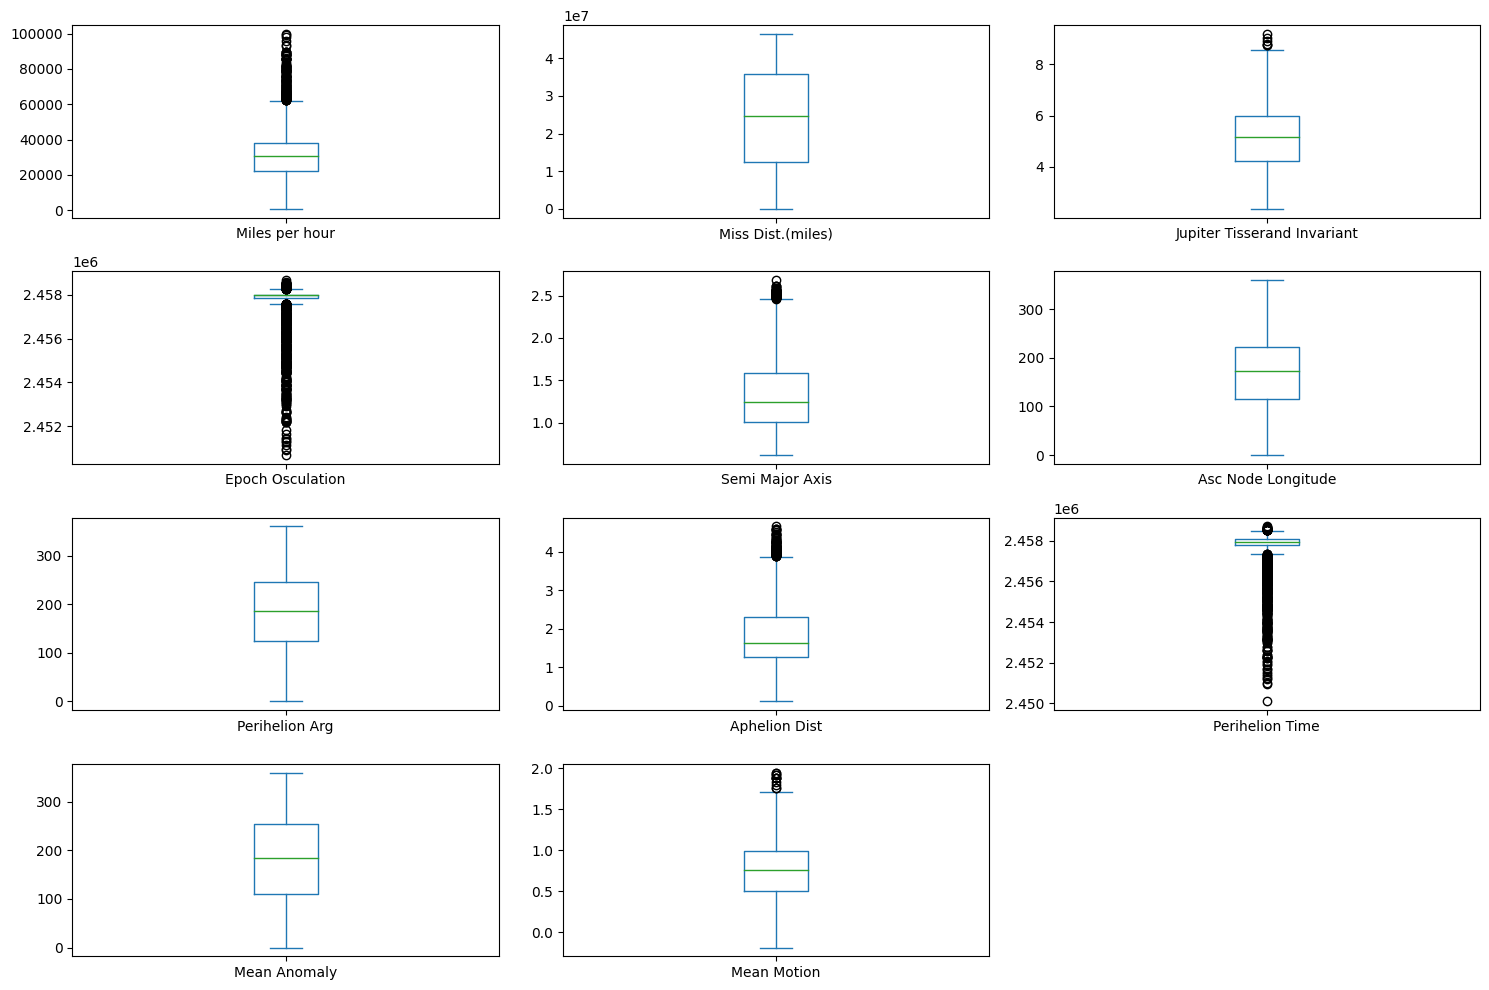

In [175]:
def plot_boxplots(df, figsize=(15, 10)):
    numerical_columns = df.select_dtypes(include=['number']).columns
    numerical_columns = [x for x in numerical_columns if not x in ["Name", "Epoch Date Close Approach", "approach_year", 
                        "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"]]
    df[numerical_columns].plot(kind='box', subplots=True, layout=(len(numerical_columns) // 3 + 1, 3), figsize=figsize)
    plt.tight_layout()
    plt.show()
    
plot_boxplots(df_scaled)

**Task:** Explore the relationship between different features using scatter plots or correlation
matrices. (Hint: Use Seaborn or similar libraries)

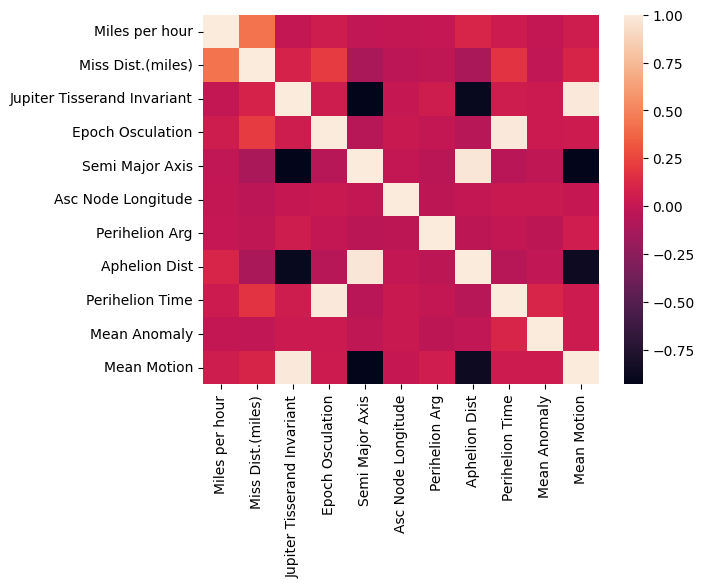

In [176]:
def corr_heatmap(df):
    copy_df = df.drop(columns=["Name", "Relative Velocity km per sec", "Epoch Date Close Approach", "approach_year", 
                        "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"])
    sb.heatmap(copy_df.corr())
    plt.show()
    
corr_heatmap(df_scaled)

### **1.3 Visualisation**

**Task:** Create a pairplot using Seaborn to visualise relationships between multiple numerical
features simultaneously.

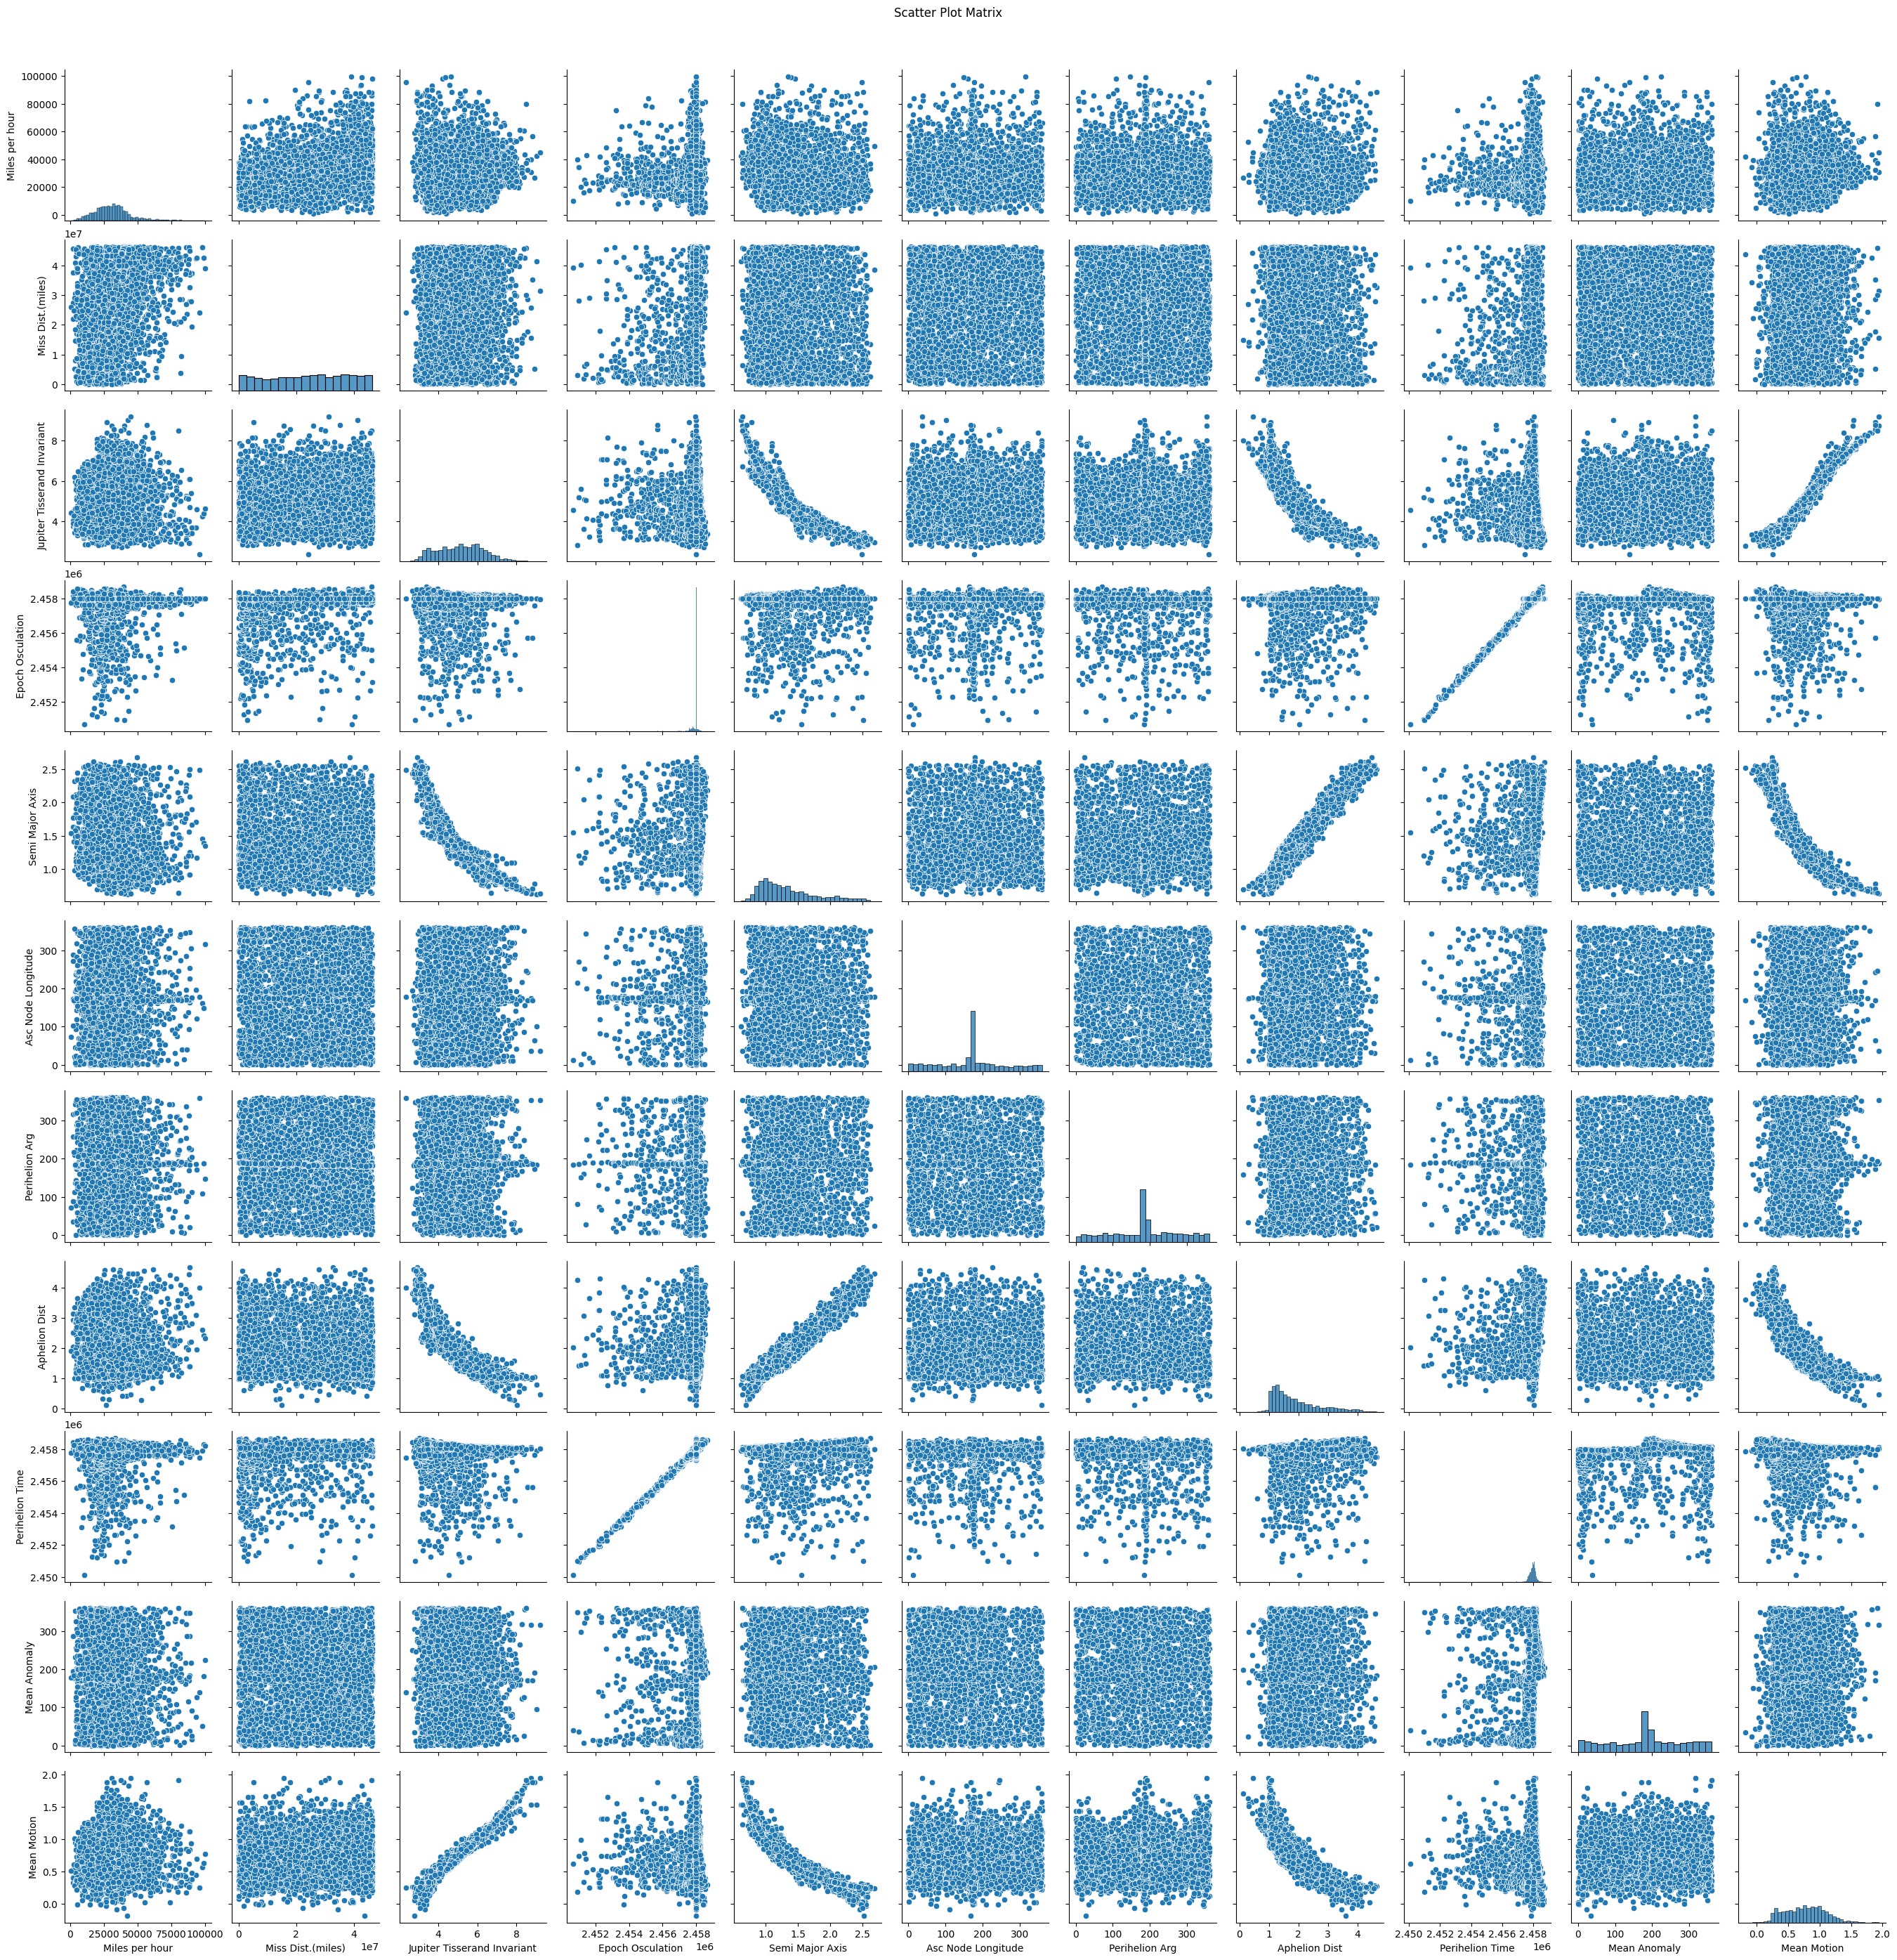

In [177]:
def scatter_plot_matrix(df):
    copy_df = df.drop(columns=["Name", "Relative Velocity km per sec", "Epoch Date Close Approach", "approach_year", 
                        "approach_month", "approach_day", "Orbital Period", "Orbit Uncertainity", "Hazardous"])
    sb.pairplot(copy_df)
    plt.suptitle('Scatter Plot Matrix', y=1.02)
    plt.show()

scatter_plot_matrix(df_scaled)

**Task:** What do you infer from these plots? How do the diagonal plots and off-diagonal plots in
a pairplot differ in the information they provide?

**A:** We can see that the following pairs of columns have strong linear relationships:
1. Jupiter Tisserand Invariant and Mean motion
2. Jupiter Tisserand Invariant and Aphelion Distance
3. Jupiter Tisserand Invariant and Semi Major Axis
4. Epoch Osculation and Perihelion Time
5. Semi Major Axis and Mean motion
6. Semi Major Axis and Aphelion Dist.
7. Aphelion Dist. and Mean motion

Given this set of associations, there is a strong possibility that the feature "Jupiter Tisserand Invariant" is **simply a confounder** in the pairs Semi Major Axis and Mean motion, Semi Major Axis and Aphelion Dist., Aphelion Dist. and Mean motion.

The diagonal plots in a pairplot usually show the distribution of individual variables (features) in the dataset. These are often represented as histograms or kernel density estimation (KDE) plots, depending on the configuration. The diagonal plots provide insight into the univariate distribution of each variable. This helps understand the spread, skewness, and modality of each feature.

The off-diagonal plots display scatter plots (or sometimes regression plots) between every pair of variables in the dataset. These plots show the bivariate relationships between pairs of variables, helping you understand potential correlations or interactions between features.

### **1.4 Tackling Class Imbalance**

**Task:** Is there a classification bias (class imbalance) in this dataset? If yes, how would you
tackle it? 

In [178]:
df_scaled["Hazardous"].value_counts()

Hazardous
False    3798
True      736
Name: count, dtype: int64

Thus we can see that there is a high degree of class imbalance in the given data. We can tackle it by using SMOTE. SMOTE (Synthetic Minority Over-sampling Technique) is used to address the issue of class imbalance in datasets, particularly in classification problems. SMOTE works by generating synthetic samples of the minority class rather than simply duplicating existing ones. It does this by selecting data points from the minority class and interpolating between them to create new, similar instances. This helps balance the class distribution and improves the model's ability to generalize to the minority class.

**IMPORTANT: In order to ensure that no information leaks over into the training set from the test set, we first split the data into trian and test sets with test_size = 0.1 and a random state for reproducibility, and only apply the SMOTE technique to the train set.**

In [179]:
X = df_scaled.drop(columns=["Hazardous"])
y = df_scaled["Hazardous"]

le = LabelEncoder()
for cols in ["Relative Velocity km per sec", "Orbital Period", "Orbit Uncertainity"]:
    X[cols] = le.fit_transform(X[cols])
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [180]:
smote_tomek = SMOTETomek(random_state=42,sampling_strategy=0.7)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
df_resampled = pd.DataFrame(np.hstack([X_resampled, y_resampled.reshape(y_resampled.shape[0], 1)]), columns=df_scaled.columns)
df_test = pd.DataFrame(np.hstack([X_test, y_test.reshape(y_test.shape[0], 1)]), columns=df_scaled.columns)
print("Class distribution before resampling:")
print(pd.DataFrame(y).value_counts())
print("\nClass distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution before resampling:
0
0    3798
1     736
Name: count, dtype: int64

Class distribution after resampling:
0    2968
1    1944
Name: count, dtype: int64


**Task:** Discuss the implication of class imbalance on model performance.

**A:** Class imbalance occurs when one class in a dataset significantly outnumbers another, leading to biased machine learning models that favor the majority class. This imbalance can result in misleading accuracy metrics, as models may predict the majority class correctly while failing to identify instances of the minority class, which is often crucial in applications like fraud detection or medical diagnosis. Consequently, sensitivity (recall) for the minority class decreases, which can have serious real-world implications. To address these challenges, it's essential to use alternative evaluation metrics, such as precision, recall, and F1-score, and apply techniques like SMOTE or undersampling to create a more balanced dataset, ensuring the model performs well across all classes and effectively generalizes to unseen data.

## **2. Numerical Interpretation and Mathematical Analysis**

### **2.1 Feature Engineering**

**Task:** Combine the approach_date, month, and year features into a single feature representing
the day of the year. Convert it into a ‘datetime’ format.

In [181]:
def date(year, month, day):
    return datetime.datetime(year, month, day)
df_resampled['approach_date'] = df_resampled.apply(lambda x: date(int(x['approach_year']), int(x['approach_month']), int(x['approach_day'])), axis=1)
df_resampled['Time Until Approach'] = df_resampled['Epoch Date Close Approach'] - int(datetime.datetime.now().timestamp()*1000) 
df_resampled['Time Until Approach'] = df_resampled['Time Until Approach'].apply(lambda x: x/(1000*60*60*24*365)) #convert to years

doing the same for test data

In [182]:
df_test['approach_date'] = df_test.apply(lambda x: date(int(x['approach_year']), int(x['approach_month']), int(x['approach_day'])), axis=1)
df_test['Time Until Approach'] = df_test['Epoch Date Close Approach'] - int(datetime.datetime.now().timestamp()*1000) 
df_test['Time Until Approach'] = df_test['Time Until Approach'].apply(lambda x: x/(1000*60*60*24*365)) #convert to years

**Task:** Create a 'Time Until Approach'
feature based on the difference between the 'Epoch Date Close Approach' and the current
date

In [183]:
df_resampled['Time Until Approach'] = df_resampled['Epoch Date Close Approach'] - int(datetime.datetime.now().timestamp()*1000) 
df_test['Time Until Approach'] = df_test['Epoch Date Close Approach'] - int(datetime.datetime.now().timestamp()*1000)
df_resampled.drop(['Epoch Date Close Approach'], axis=1, inplace=True)
df_test.drop(['Epoch Date Close Approach'], axis=1, inplace=True) 

**Task:** Calculate the ratio of Miss Distance vs. Semi-major axis.

In [184]:
df_resampled['Miss_Distance_ratio'] = 1.609*df_resampled['Miss Dist.(miles)'] / df_resampled['Semi Major Axis']
df_test['Miss_Distance_ratio'] = 1.609*df_test['Miss Dist.(miles)'] / df_test['Semi Major Axis']

**Task:** Calculate the eccentricity of the orbit, average orbital velocity, and orbital period using
Kepler’s Law

In [185]:
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the Sun (kg)

In [186]:
df_resampled['eccentricity'] = (df_resampled['Aphelion Dist']/df_resampled['Semi Major Axis']) - 1 
df_resampled['eccentricity'] = df_resampled['eccentricity'].apply(lambda x: 0 if x<0 else x)

df_test['eccentricity'] = (df_test['Aphelion Dist']/df_test['Semi Major Axis']) - 1 
df_test['eccentricity'] = df_test['eccentricity'].apply(lambda x: 0 if x<0 else x)

ap = 5.2
df_resampled['Inclination'] =np.sqrt(ap/(df_resampled['Semi Major Axis']*(1-df_resampled['eccentricity']**2)))*np.arccos(0.5*(df_resampled['Jupiter Tisserand Invariant'] - (ap/df_resampled['Semi Major Axis'])))
r = df_resampled['Semi Major Axis']*(1-df_resampled['eccentricity']**2)/(1+df_resampled['eccentricity']*np.cos(df_resampled['Inclination']))
df_resampled['Avg Orbital Velocity'] = np.sqrt(G*M_sun*(2/r - 1/df_resampled['Semi Major Axis'])*(1/1.496e11))

df_resampled['Orbital Period'] = np.sqrt((4*(np.pi**2)/(G*M_sun))*(1.496e11*df_resampled['Semi Major Axis'])**3)

df_test['Inclination'] =np.sqrt(ap/(df_test['Semi Major Axis']*(1-df_test['eccentricity']**2)))*np.arccos(0.5*(df_test['Jupiter Tisserand Invariant'] - (ap/df_test['Semi Major Axis'])))
r = df_test['Semi Major Axis']*(1-df_test['eccentricity']**2)/(1+df_test['eccentricity']*np.cos(df_test['Inclination']))
df_test['Avg Orbital Velocity'] = np.sqrt(G*M_sun*(2/r - 1/df_test['Semi Major Axis'])*(1/1.496e11))

df_test['Orbital Period'] = np.sqrt((4*(np.pi**2)/(G*M_sun))*(1.496e11*df_test['Semi Major Axis'])**3)

**Task:** Calculate the heliocentric distance, escape velocity, and specific orbital energy

In [187]:
df_resampled['heliocentric_distance'] = df_resampled['Semi Major Axis'] * (1 - df_resampled['eccentricity']*np.cos(df_resampled['Mean Anomaly']))

df_resampled['escape_velocity'] = np.sqrt(2 * G * M_sun / (1.496e11*df_resampled['heliocentric_distance']))

df_resampled['Specific orbital energy'] = - M_sun / 2 * df_resampled['Semi Major Axis']

df_test['heliocentric_distance'] = df_test['Semi Major Axis'] * (1 - df_test['eccentricity']*np.cos(df_test['Mean Anomaly']))

df_test['escape_velocity'] = np.sqrt(2 * G * M_sun / (1.496e11*df_test['heliocentric_distance']))

df_test['Specific orbital energy'] = - M_sun / 2 * df_test['Semi Major Axis']

**Task:** Calculate the Specific Angular Momentum using the formula: $$h=\sqrt{GMa(1−e²)}$$

In [188]:
df_resampled['specific_angular_momentum'] = np.sqrt(G * M_sun * df_resampled['Semi Major Axis'] * (1 - df_resampled['eccentricity']**2))
df_test['specific_angular_momentum'] = np.sqrt(G * M_sun * df_test['Semi Major Axis'] * (1 - df_test['eccentricity']**2))

**Task:** Calculate the velocity at Perihelion and Aphelion

In [189]:
df_resampled['Aphelion Velocity'] = (2*np.pi*df_resampled['Semi Major Axis']*1.496e11/df_resampled['Orbital Period'])*np.sqrt((1-df_resampled['eccentricity'])/(1+df_resampled['eccentricity']))
df_resampled['Perhelion Velocity'] = (2*np.pi*df_resampled['Semi Major Axis']*1.496e11/df_resampled['Orbital Period'])*np.sqrt((1+df_resampled['eccentricity'])/(1-df_resampled['eccentricity']))

df_test['Aphelion Velocity'] = (2*np.pi*df_test['Semi Major Axis']*1.496e11/df_test['Orbital Period'])*np.sqrt((1-df_test['eccentricity'])/(1+df_test['eccentricity']))
df_test['Perhelion Velocity'] = (2*np.pi*df_test['Semi Major Axis']*1.496e11/df_test['Orbital Period'])*np.sqrt((1+df_test['eccentricity'])/(1-df_test['eccentricity']))

**Task:** Average the Miss distance of various categories and find the closest approach distance

In [190]:
average_miss_distance = df.groupby('Hazardous')['Miss Dist.(miles)'].mean().reset_index()

closest_approach_distance = df['Miss Dist.(miles)'].min()

print("Average Miss Distance by Category:")
print(average_miss_distance)
print("\nClosest Approach Distance (in miles):", closest_approach_distance)

Average Miss Distance by Category:
   Hazardous  Miss Dist.(miles)
0      False       2.363638e+07
1       True       2.535247e+07

Closest Approach Distance (in miles): 16534.6171875


**Task:** Calculate Synodic Period and Mean Motion using the orbital period.

In [191]:
earth_orbital_period = 365.25*24*60*60  # days
df_resampled['mean_motion'] = 2 * np.pi / df_resampled['Orbital Period']
df_resampled['synodic_period'] = np.abs(1 / df_resampled['Orbital Period'] - 1 / earth_orbital_period)
df_resampled['synodic_period'] = 1 / df_resampled['synodic_period']

df_test['mean_motion'] = 2 * np.pi / df_test['Orbital Period']
df_test['synodic_period'] = np.abs(1 / df_test['Orbital Period'] - 1 / earth_orbital_period)
df_test['synodic_period'] = 1 / df_test['synodic_period']

### **2.2 Additional Features**

**ω** is defining the angular velocity of the object when it is closest to the earth

In [192]:
df_resampled['Omega'] = df_resampled['Miles per hour']*df_resampled['Miss Dist.(miles)']
df_test['Omega'] = df_test['Miles per hour']*df_test['Miss Dist.(miles)']

The AutoFeatClassifier is a tool from the AutoFeat Python library that automates feature engineering and selection for classification tasks. It can create, combine, and select the best features from your dataset to improve model performance without requiring you to manually craft new features.

In [193]:
# X = df_resampled.drop(columns=['Name', 'approach_year', 'approach_month', 'approach_day','approach_date','Epoch Osculation','Relative Velocity km per sec',
#        'Orbital Period', 'Orbit Uncertainity','Hazardous'])
# y = df_resampled['Hazardous']
# autofeature = AutoFeatClassifier()
# X_transformed = autofeature.fit_transform(X, y)
# X_transformed_df = pd.DataFrame(X_transformed, columns=X_transformed.columns)
# df_resampled = pd.concat([df_resampled.reset_index(drop=True), X_transformed_df.reset_index(drop=True)], axis=1)
# X_test = df_test.drop(columns=['Name', 'approach_year', 'approach_month', 'approach_day','approach_date','Epoch Osculation','Relative Velocity km per sec',
#        'Orbital Period', 'Orbit Uncertainity','Hazardous'])  # Again, replace with your target column name
# X_test_transformed = autofeature.transform(X_test)
# X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=X_test_transformed.columns)
# df_test = pd.concat([df_test.reset_index(drop=True), X_test_transformed_df.reset_index(drop=True)], axis=1)
# print("Training dataset with new features:\n", df_resampled.head())
# print("Test dataset with new features:\n", df_test.head())

In [194]:
df_resampled.shape

(4912, 34)

In [195]:
df_test.shape

(454, 34)

## **3. Handling Binned Values**

**Task:** Modify the binned features that have an ordinal relationship in this manner:
(very slow = 0, slow = 1, fast = 2, very fast = 3, etc). One-hot encode the binned features whose relationship is not strictly ordinal.

**A:** This has already been implemented in the cell before SMOTE. Also all categorical variables have an ordinal relationship in the categories.

## **4. Hazardous Classification**

In [196]:
df_resampled.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [197]:
X_resampled = df_resampled.drop(['Name','approach_date','approach_year','approach_month', 'approach_day', 'Hazardous','Epoch Osculation'], axis=1)
y_resampled = df_resampled['Hazardous']
X_test = df_test.drop(['Name','approach_date','approach_year','approach_month', 'approach_day', 'Hazardous','Epoch Osculation'], axis=1)
y_test = df_test['Hazardous']

In [198]:
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=15)
rfe = rfe.fit(X_resampled, y_resampled)
selected_features = X_resampled.columns[rfe.support_]

X_resampled = X_resampled[selected_features]
X_test = X_test[selected_features]

In [199]:
X_resampled_num = X_resampled.drop(columns=['Relative Velocity km per sec','Orbit Uncertainity'])
X_test_num = X_test.drop(columns=['Relative Velocity km per sec','Orbit Uncertainity'])
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_num)
X_resampled_scaled = scaler.transform(X_resampled_num)
X_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X_resampled_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)
X_resampled = pd.concat([X_resampled_scaled, X_resampled[['Relative Velocity km per sec','Orbit Uncertainity']]], axis=1)
X_test = pd.concat([X_test_scaled, X_test[['Relative Velocity km per sec','Orbit Uncertainity']]], axis=1)

**Task:**  Build a robust and efficient classifier to clasify asteroids as Hazardous (1) or Not Hazardous (0)

**A:** XGBoost (Extreme Gradient Boosting) is a highly efficient and scalable machine learning algorithm based on the principle of gradient boosting, which builds an ensemble of decision trees to improve predictive accuracy.

In [200]:
X_resampled = X_resampled.values
X_test = X_test.values
xgb_model = XGBClassifier(
    objective='binary:logistic',
    alpha=0.01,  
    lambda_=0.1, 
    eval_metric='logloss',  
    use_label_encoder=False 
)
xgb_model.fit(X_resampled, y_resampled)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print( f"Train Accuracy: {accuracy_score(y_resampled, xgb_model.predict(X_resampled))}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Train Accuracy: 0.9989820846905537
Test Accuracy: 0.8281938325991189
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       386
         1.0       0.43      0.43      0.43        68

    accuracy                           0.83       454
   macro avg       0.66      0.66      0.66       454
weighted avg       0.83      0.83      0.83       454



**Task:** Implement K-Fold Cross Validation for training. Train the dataset for all values of K from 2 to 10. Plot the loss and accuracy versus epochs for these K values.

**A:** K-fold cross-validation is used to evaluate the performance of a machine learning model in a more reliable and generalized way by splitting the dataset into K equally-sized subsets (or "folds"). This method helps ensure that the model is not overfitting or underfitting to a particular subset of data and provides a better estimate of how well the model will perform on unseen data.

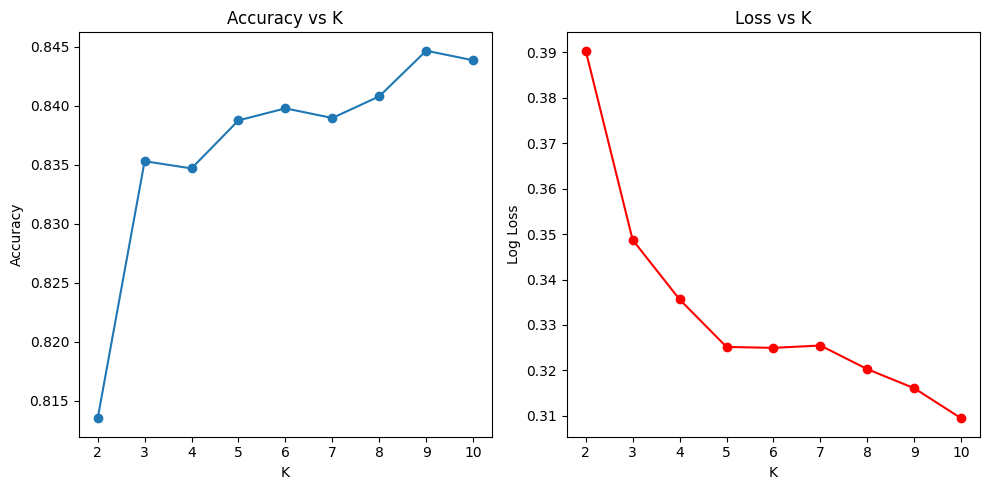

In [201]:
k_values = range(2, 11)
fold_accuracies = []
fold_losses = []
import sklearn.metrics as metrics
xgb_clf  = xgb_model
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    losses = []
    for train_idx, val_idx in kf.split(X_resampled):
        X_train_k, X_val_k = X_resampled[train_idx], X_resampled[val_idx]
        y_train_k, y_val_k = y_resampled[train_idx], y_resampled[val_idx]
        xgb_clf.fit(X_train_k, y_train_k, eval_set=[(X_val_k, y_val_k)], verbose=False)

        y_val_pred_prob = xgb_clf.predict_proba(X_val_k)[:, 1]
        y_val_pred = (y_val_pred_prob >= 0.25).astype(int)
        
        acc = accuracy_score(y_val_k, y_val_pred)
        loss = metrics.log_loss(y_val_k, y_val_pred_prob)

        accuracies.append(acc)
        losses.append(loss)

    fold_accuracies.append(np.mean(accuracies))
    fold_losses.append(np.mean(losses))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, fold_accuracies, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(k_values, fold_losses, marker='o', color='red')
plt.title('Loss vs K')
plt.xlabel('K')
plt.ylabel('Log Loss')

plt.tight_layout()
plt.show()

**Task:** Optimise all the hyperparameters used in the classifier by selecting an appropriate optimisation method.

**A:** GridSearch is a technique used to find the optimal hyperparameters for a machine learning model by systematically searching through a predefined set of hyperparameter combinations. It exhaustively evaluates every combination of hyperparameters using cross-validation to determine which set yields the best model performance.

In [202]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           scoring='f1', cv=5, verbose=1)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
best_xgb_clf = grid_search.best_estimator_
best_xgb_clf.fit(X_resampled, y_resampled)
y_pred_proba = best_xgb_clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.25).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Train Accuracy: {accuracy_score(y_resampled, best_model.predict(X_resampled))}")
print(f"Classification Report:\n{report}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Test Accuracy: 0.8039647577092511
Train Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       386
         1.0       0.40      0.65      0.50        68

    accuracy                           0.80       454
   macro avg       0.67      0.74      0.69       454
weighted avg       0.85      0.80      0.82       454



**A:** Bayesian Optimization is a probabilistic method used to efficiently search for optimal hyperparameters for models like XGBClassifier by modeling the performance of hyperparameters.An objective function evaluates the model with suggested hyperparameters, and cross-validation is employed to assess its performance.

In [203]:
def objective(trial):
    param = {
        'booster': 'gbtree',
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0)
    }
    model = XGBClassifier(**param)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1', n_jobs=-1)
    return scores.mean()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best trial parameters:", study.best_trial.params)
print("Best F1 score:", study.best_value)
best_params = study.best_trial.params
best_model = XGBClassifier(**best_params)
best_model.fit(X_resampled, y_resampled)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.25).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Train Accuracy: {accuracy_score(y_resampled, best_model.predict(X_resampled))}")
print(f"Classification Report:\n{report}")

[I 2024-10-17 10:18:31,276] A new study created in memory with name: no-name-5e69d224-60e1-4410-b7d9-0027aa29ef98
[I 2024-10-17 10:18:33,751] Trial 0 finished with value: 0.7852972315841592 and parameters: {'learning_rate': 0.25539165226272864, 'max_depth': 3, 'n_estimators': 288, 'min_child_weight': 7, 'gamma': 0.4844199856413526, 'subsample': 0.8924284416753293, 'colsample_bytree': 0.8101831029929681, 'lambda': 0.9125238062771046, 'alpha': 0.9338788370798121}. Best is trial 0 with value: 0.7852972315841592.
[I 2024-10-17 10:18:34,747] Trial 1 finished with value: 0.7304329614113774 and parameters: {'learning_rate': 0.0176098264939076, 'max_depth': 3, 'n_estimators': 393, 'min_child_weight': 4, 'gamma': 0.37750259919535184, 'subsample': 0.9285544421133074, 'colsample_bytree': 0.7338321213308228, 'lambda': 0.13279858896406757, 'alpha': 0.43791379536967695}. Best is trial 0 with value: 0.7852972315841592.
[I 2024-10-17 10:18:36,326] Trial 2 finished with value: 0.8028931692291627 and pa

Best trial parameters: {'learning_rate': 0.20291648243012408, 'max_depth': 8, 'n_estimators': 217, 'min_child_weight': 1, 'gamma': 0.11330370428249437, 'subsample': 0.6257991032812364, 'colsample_bytree': 0.9431379294941604, 'lambda': 0.11684404818204079, 'alpha': 0.43028455959167944}
Best F1 score: 0.8208619763285402
Test Accuracy: 0.8127753303964758
Train Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.88       386
         1.0       0.42      0.62      0.50        68

    accuracy                           0.81       454
   macro avg       0.67      0.73      0.69       454
weighted avg       0.85      0.81      0.83       454



The Bayesian Optimizer is outperforming the Gridsearch

**Task:** Plot the ROC curve and Confusion Matrix to quantify the performance of your classifier.

**A:** The ROC curve (Receiver Operating Characteristic curve) is used to evaluate the performance of a binary classification model by showing the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at different threshold settings. It helps visualize how well a model distinguishes between the two classes across various decision thresholds.

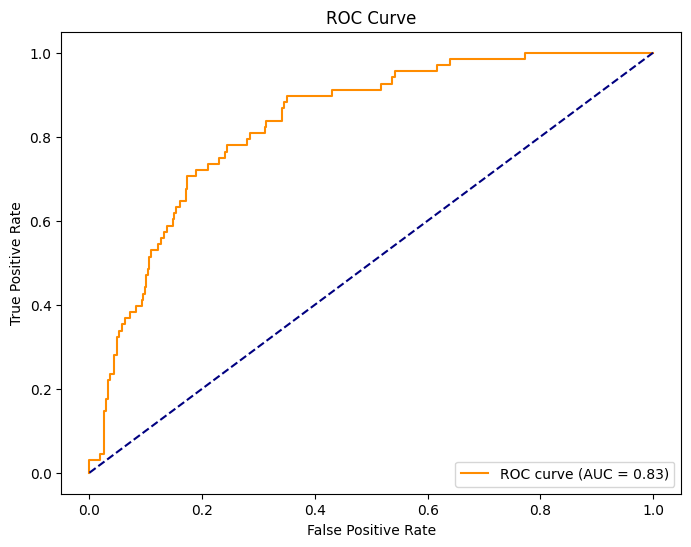

In [204]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**A:**  Confusion matrix is used to evaluate the performance of a classification model by providing a detailed breakdown of the model’s predictions compared to the actual outcomes. It helps identify how well the model distinguishes between different classes and provides insights into specific types of prediction errors.

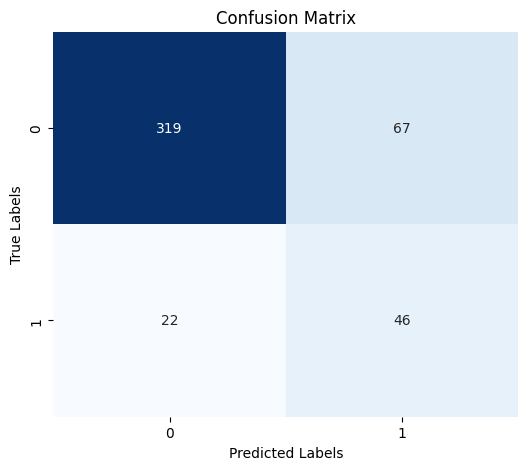

              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       386
         1.0       0.41      0.68      0.51        68

    accuracy                           0.80       454
   macro avg       0.67      0.75      0.69       454
weighted avg       0.86      0.80      0.82       454



In [214]:
y_pred = (y_pred_prob >= 0.2).astype(int)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(classification_report(y_test, y_pred))

**Task:** Use SHAP Values, Permutation Importance, or Partial Dependence Plots to list the most
and least useful features.

**A:** SHAP (SHapley Additive exPlanations) is used to explain the output of machine learning models by attributing the contribution of each feature to the final prediction. SHAP provides a consistent and unified measure of feature importance, which is especially useful for interpreting complex models like neural networks, gradient boosting, or ensemble methods.

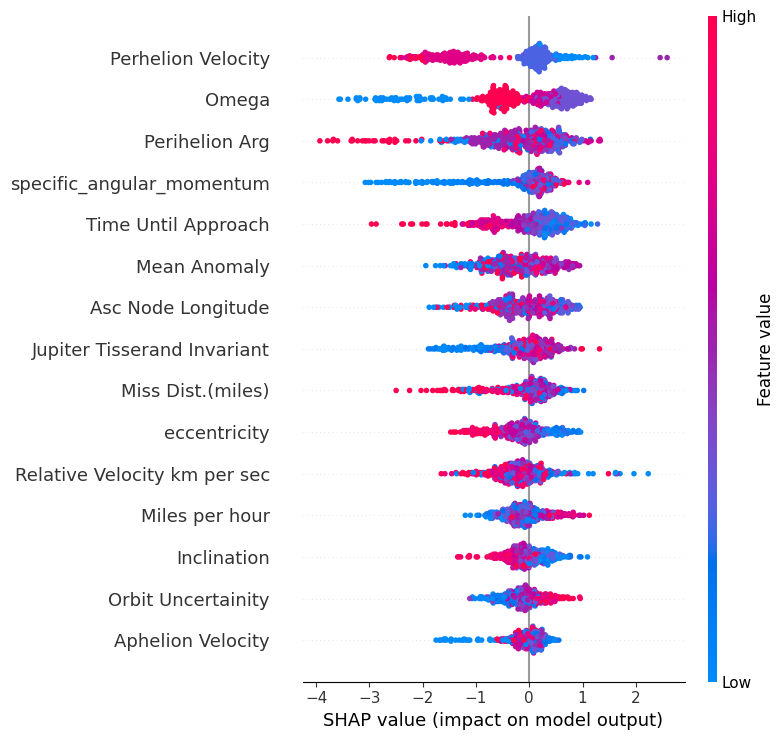

In [206]:
explainer = shap.Explainer(xgb_clf)
X_test_df = pd.DataFrame(X_test,columns=selected_features)
shap_values = explainer(X_test_df)
shap.summary_plot(shap_values, X_test_df)

**A:** Permutation importance is used to assess the significance of individual features in a machine learning model by measuring the impact on model performance when the values of a feature are randomly shuffled. This method helps determine how much a model relies on each feature for making accurate predictions.

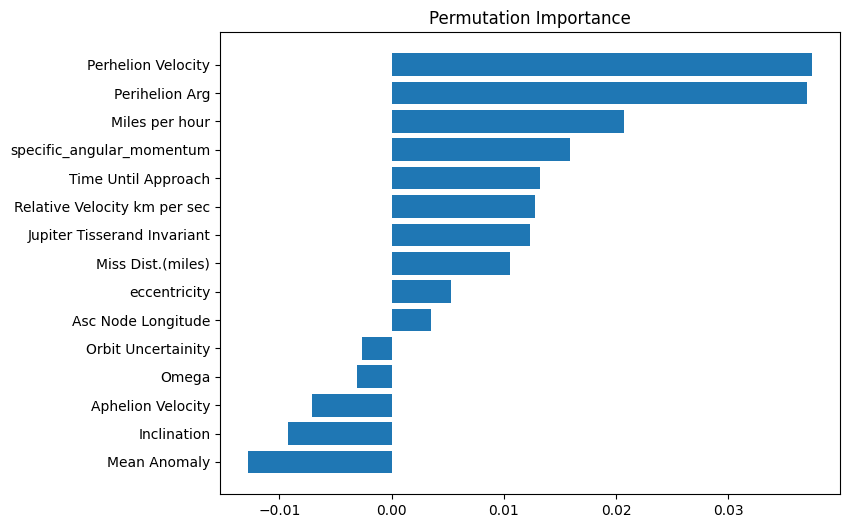

In [207]:
perm_importance = permutation_importance(xgb_clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
X_test_df = pd.DataFrame(X_test, columns=selected_features)

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test_df.iloc[:, sorted_idx].columns)
plt.title('Permutation Importance')
plt.show()

## **5. Anomaly Detection**

**Task:** Perform anomaly detection using 

**(i)** Any inbuilt library of your choice.

**(ii)** Writing your own anomaly detection algorithm.

Compare the results from both methods by plotting a Confusion Matrix. 

Print the number of examples flagged by both algorithms.

**A:** Isolation Forest is an ensemble learning method used primarily for anomaly detection (also known as outlier detection). It is particularly effective for high-dimensional datasets. 

In [208]:
df_imputed.drop(columns=['Orbital Period','Orbit Uncertainity','Relative Velocity km per sec'],inplace=True)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_imputed['iso_forest_anomaly'] = iso_forest.fit_predict(df_imputed.drop(columns=['Name', 'Hazardous']))
df_imputed['iso_forest_anomaly'] = df_imputed['iso_forest_anomaly'].apply(lambda x: 1 if x == -1 else 0)
iso_forest_anomalies = df_imputed['iso_forest_anomaly'].sum()
print(f"Number of anomalies detected by Isolation Forest: {iso_forest_anomalies}")

Number of anomalies detected by Isolation Forest: 227


**A:** We implemented an AutoEncoder to compress and reconstruct normal data, training it to minimize reconstruction loss. Afterward, we passed the dataset through the model and flagged anomalies based on high reconstruction errors. Finally, we compared the anomalies detected by the AutoEncoder with those from Isolation Forest using a confusion matrix.

In [217]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed.drop(columns=['Name', 'Hazardous']).values)

normal_data = df_imputed[df_imputed['Hazardous'] == 0].drop(columns=['Name', 'Hazardous']).values
normal_data_scaled = scaler.transform(normal_data)

input_layer = layers.Input(shape=(normal_data_scaled.shape[1],))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(normal_data_scaled.shape[1], activation='linear')(decoded)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(normal_data_scaled, normal_data_scaled, epochs=10, batch_size=32, shuffle=True, validation_split=0.1)
reconstructed_scaled = autoencoder.predict(scaled_data)
mse = np.mean(np.square(scaled_data - reconstructed_scaled), axis=1)
threshold = np.percentile(mse, 90)
df_imputed['autoencoder_anomaly'] = (mse > threshold).astype(int)
autoencoder_anomalies = df_imputed['autoencoder_anomaly'].sum()
print(f"Number of anomalies detected by AutoEncoder: {autoencoder_anomalies}")

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.9266 - val_loss: 0.6651
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4551 - val_loss: 0.3218
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2512 - val_loss: 0.1851
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1535 - val_loss: 0.1347
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1085 - val_loss: 0.0973
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0727 - val_loss: 0.0693
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0517 - val_loss: 0.0520
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0391 - val_loss: 0.0449
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317 - val_loss: 0.0346
Epoch 10/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265 - val_loss: 0.0294
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Number of anomalies detected by AutoEncoder: 454


Confusion Matrix:
[[4007  300]
 [  73  154]]


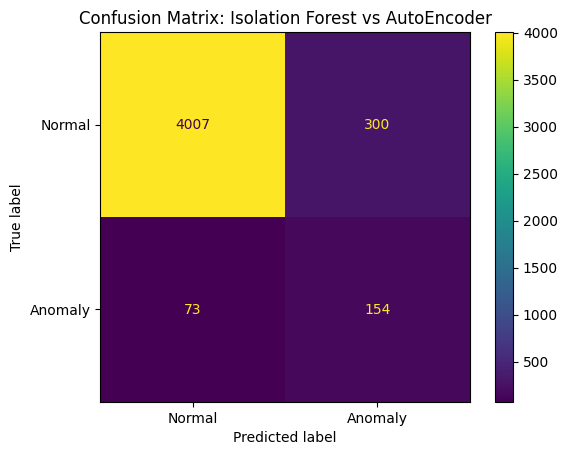

Number of examples flagged by both algorithms: 154


In [218]:
cm = confusion_matrix(df_imputed['iso_forest_anomaly'], df_imputed['autoencoder_anomaly'])
print(f"Confusion Matrix:\n{cm}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot()
plt.title('Confusion Matrix: Isolation Forest vs AutoEncoder')
plt.show()
both_flagged = np.logical_and(df_imputed['iso_forest_anomaly'] == 1, df_imputed['autoencoder_anomaly'] == 1).sum()
print(f"Number of examples flagged by both algorithms: {both_flagged}")